# 1. Initial imports

In [1]:
# to import files from googledrive
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [2]:
import os

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

#for text pre-processing
import re, string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('omw-1.4')

#for model-building
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC #JC
from sklearn.ensemble import RandomForestClassifier #JC
from sklearn.neighbors import KNeighborsClassifier #JC
from sklearn.naive_bayes import GaussianNB #JC
from sklearn.tree import DecisionTreeClassifier #JC
from sklearn.svm import SVC #JC
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix, precision_score, recall_score, precision_recall_fscore_support
from sklearn.metrics import roc_curve, auc, roc_auc_score

# bag of words
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer #JC

#for word embedding
import gensim
from gensim.models import Word2Vec #Word2Vec is mostly used for huge datasets

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


# 2. Data for Classification

Load the data for classification

In [4593]:
path = 'gdrive/My Drive/sample_size/diabetes/'

In [4594]:
#data_for_classifier = pd.read_csv(path+'5000_data_for_classifier.csv') #8000 limit\
#data_for_classifier = pd.read_csv(path+'data/12k_data_for_classifier.csv')
data_for_classifier = pd.read_csv(path+'10k_data_for_classifier_diab.csv')

In [4595]:
data_for_classifier.head()

,Unnamed: 0,subject_id,icd9_code,gender,dob,ethnicity,text,no_of_docs,label
0,7389,10935,V290,M,2184-03-22 00:00:00,WHITE,Nursing Progress Note\n\n\n#1 Continues on AMP...,26,0
1,2602,56746,25000,M,2076-12-22 00:00:00,WHITE,[**2143-2-26**] 8:47 AM\n CTA ABD & PELVIS ...,49,1
2,7986,93337,30000,M,2083-10-22 00:00:00,WHITE,Sinus rhythm. Normal tracing. Compared to the ...,35,0
3,2516,63192,25000,M,2130-01-20 00:00:00,WHITE,[**2193-9-9**] 11:45 AM\n CHEST PORT. LINE PLA...,40,1
4,9324,12451,4738,F,2091-07-09 00:00:00,WHITE,Nursing Progress/Transfer note 0700-1300\nPt a...,28,0


In [4596]:
data_for_classifier.describe()

,Unnamed: 0,subject_id,no_of_docs,label
count,10000.00000,10000.000000,10000.000000,10000.000000
mean,4999.50000,34703.245700,34.908400,0.500000
std,2886.89568,28566.084337,11.479189,0.500025
min,0.00000,20.000000,3.000000,0.000000
25%,2499.75000,12254.000000,27.000000,0.000000
50%,4999.50000,23109.500000,36.000000,0.500000
75%,7499.25000,58705.000000,45.000000,1.000000
max,9999.00000,99999.000000,50.000000,1.000000


In [4597]:
data_for_classifier['label'].value_counts()

0    5000
1    5000
Name: label, dtype: int64

# 3. Split data into different sample sizes and proportions



In [4598]:
n = 200 #change to 5000, 4000, 3000, 2000, 1000, 800, 600, 500, 400, 200

p1 = 0.99 #change to 0.99, 0.95, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.3, 0.1. 0.05, 0.01
p0 = 0.01 #change to 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.99

ss0 = int(n*p0) 
ss1 = int(n*p1)

In [4599]:
print("sample size for class 0: ", ss0)
print("sample size for class 1: ", ss1)

sample size for class 0:  2
sample size for class 1:  198


In [4600]:
s0 = data_for_classifier.label[data_for_classifier.label.eq(0)].sample(ss0).index
s1 = data_for_classifier.label[data_for_classifier.label.eq(1)].sample(ss1).index 

data_for_classifier = data_for_classifier.loc[s0.union(s1)]

In [4601]:
data_for_classifier['label'].value_counts()

1    198
0      2
Name: label, dtype: int64

Split the data into train and test (80:20)

In [4602]:
training_data, testing_data = train_test_split(data_for_classifier, test_size=0.2, random_state=1)

In [4603]:
print(f"No. of training examples: {training_data.shape[0]}")
print(f"No. of testing examples: {testing_data.shape[0]}")

No. of training examples: 160
No. of testing examples: 40


In [4604]:
training_data.head()

,Unnamed: 0,subject_id,icd9_code,gender,dob,ethnicity,text,no_of_docs,label
5277,3690,17193,25000,M,2044-05-12 00:00:00,ASIAN - CHINESE,[**2119-10-18**] 3:44 PM\n CT CHEST W/O CONTRA...,36,1
5260,2367,8967,25000,F,2063-10-29 00:00:00,UNKNOWN/NOT SPECIFIED,Admission Date: [**2116-3-2**] Discharg...,32,1
9460,431,2457,25000,F,2060-02-16 00:00:00,HISPANIC OR LATINO,Admission Date: [**2139-10-29**] ...,18,1
1066,3381,18167,25000,F,2062-02-15 00:00:00,UNKNOWN/NOT SPECIFIED,"CCU Nursing Progress Note 7p-7a\nS: ""I am okay...",42,1
2949,3083,27402,25000,M,2045-01-01 00:00:00,ASIAN,"Neuro:Alert/oriented x3,MAE,PERRL. Patient spe...",44,1


In [4605]:
training_data.describe()

,Unnamed: 0,subject_id,no_of_docs,label
count,160.000000,160.000000,160.000000,160.000000
mean,2311.225000,31388.300000,36.281250,0.987500
std,1525.982768,26620.538329,10.739436,0.111451
min,0.000000,24.000000,6.000000,0.000000
25%,1093.000000,11865.500000,30.000000,1.000000
50%,2157.500000,21642.000000,37.000000,1.000000
75%,3470.500000,48141.750000,45.000000,1.000000
max,9257.000000,99138.000000,50.000000,1.000000


In [4606]:
testing_data.head()

,Unnamed: 0,subject_id,icd9_code,gender,dob,ethnicity,text,no_of_docs,label
3002,152,29667,25000,F,2040-04-17 00:00:00,WHITE,Admission Date: [**2118-7-27**] ...,48,1
2348,3121,7300,25000,F,2089-01-14 00:00:00,ASIAN,[**2153-6-15**] 5:01 AM\n THORACIC ...,36,1
2079,2175,86622,25000,M,2107-01-29 00:00:00,WHITE,[**2179-8-2**] 1:33 PM\n MR HEAD W & W/O CONTR...,40,1
5112,1853,42131,25000,F,2102-01-03 00:00:00,WHITE,PATIENT/TEST INFORMATION:\nIndication: Cerebr...,45,1
9173,4257,15121,25000,M,2114-07-24 00:00:00,HISPANIC OR LATINO,Sinus rhythm\nInferior T wave changes are nons...,35,1


In [4607]:
testing_data.describe()

,Unnamed: 0,subject_id,no_of_docs,label
count,40.000000,40.000000,40.000000,40.0
mean,2948.475000,37453.000000,36.450000,1.0
std,1419.539398,30321.968462,10.502625,0.0
min,18.000000,1220.000000,10.000000,1.0
25%,1906.250000,14804.500000,30.000000,1.0
50%,3262.000000,23934.000000,36.000000,1.0
75%,3949.500000,63121.750000,45.000000,1.0
max,4985.000000,96817.000000,50.000000,1.0


In [4608]:
training_data['label'].value_counts(normalize=True)

1    0.9875
0    0.0125
Name: label, dtype: float64

In [4609]:
testing_data['label'].value_counts(normalize=True)

1    1.0
Name: label, dtype: float64

# 4. BERT Classification

# BERT imports

In [ ]:
import tensorflow as tf

# Get the GPU device name.
device_name = tf.test.gpu_device_name()

# The device name should look like the following:
if device_name == '/device:GPU:0':
    print('Found GPU at: {}'.format(device_name))
else:
    raise SystemError('GPU device not found')

Found GPU at: /device:GPU:0


In [ ]:
import torch

# If there's a GPU available...
if torch.cuda.is_available():    

    # Tell PyTorch to use the GPU.    
    device = torch.device("cuda")

    print('There are %d GPU(s) available.' % torch.cuda.device_count())

    print('We will use the GPU:', torch.cuda.get_device_name(0))

# If not...
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
We will use the GPU: Tesla T4


In [ ]:
##!pip install transformers==4.5.0
!pip uninstall -y transformers
!pip install transformers


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 46.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.2/199.2 KB 23.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 70.0 MB/s eta 0:00:00


In [ ]:
from collections import Counter
import numpy as np
import pandas as pd
import torch
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report
from sklearn.model_selection import StratifiedKFold
from torch.nn.utils.rnn import pad_sequence
from torch.utils.data import TensorDataset
from tqdm import trange
from transformers import BertForSequenceClassification, BertTokenizerFast, BertTokenizer, AdamW, AutoModel, AutoModelForSequenceClassification, AutoTokenizer

In [ ]:
from transformers import BertTokenizer, AutoTokenizer

# Load the BERT tokenizer.
print('Loading BERT tokenizer...')
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

Loading BERT tokenizer...


In [ ]:
#Diana's code - can do the same for precision ci and recall ci using precision_score and recall_score (first import them) instead of f1_score

def f1_conf_int(target, predict, bootstrap_n = 500):
    n = len(target)
    f1 = np.zeros(bootstrap_n)
    for bs in np.arange(bootstrap_n):
        i = np.random.choice(n, n, replace = True)
        tp = pd.DataFrame({"t": target, "p": predict})
        tp_bootstrap = tp.iloc[i, :]
        f1[bs] = (f1_score(tp_bootstrap["t"], tp_bootstrap["p"], average='weighted'))
    res = [f1.mean(), np.quantile(f1,0.025), np.quantile(f1,0.975), f1.std()]
    return res

def precision_conf_int(target, predict, bootstrap_n = 500):
    n = len(target)
    p = np.zeros(bootstrap_n)
    for bs in np.arange(bootstrap_n):
        i = np.random.choice(n, n, replace = True)
        tp = pd.DataFrame({"t": target, "p": predict})
        tp_bootstrap = tp.iloc[i, :]
        p[bs] = (precision_score(tp_bootstrap["t"], tp_bootstrap["p"], average='weighted'))
    res = [p.mean(), np.quantile(p,0.025), np.quantile(p,0.975), p.std()]
    return res
  
def recall_conf_int(target, predict, bootstrap_n = 500):
    n = len(target)
    r = np.zeros(bootstrap_n)
    for bs in np.arange(bootstrap_n):
        i = np.random.choice(n, n, replace = True)
        tp = pd.DataFrame({"t": target, "p": predict})
        tp_bootstrap = tp.iloc[i, :]
        r[bs] = (recall_score(tp_bootstrap["t"], tp_bootstrap["p"], average='weighted'))
    res = [r.mean(), np.quantile(r,0.025), np.quantile(r,0.975), r.std()]
    return res

def class_0_f1_conf_int(target, predict, bootstrap_n = 500):
    n = len(target)
    r = np.zeros(bootstrap_n)
    for bs in np.arange(bootstrap_n):
        i = np.random.choice(n, n, replace = True)
        tp = pd.DataFrame({"t": target, "p": predict})
        tp_bootstrap = tp.iloc[i, :]
        r[bs] = (f1_score(tp_bootstrap["t"], tp_bootstrap["p"], pos_label=0, average='binary'))
    res = [r.mean(), np.quantile(r,0.025), np.quantile(r,0.975), r.std()]
    return res

def class_1_f1_conf_int(target, predict, bootstrap_n = 500):
    n = len(target)
    r = np.zeros(bootstrap_n)
    for bs in np.arange(bootstrap_n):
        i = np.random.choice(n, n, replace = True)
        tp = pd.DataFrame({"t": target, "p": predict})
        tp_bootstrap = tp.iloc[i, :]
        r[bs] = (f1_score(tp_bootstrap["t"], tp_bootstrap["p"], pos_label=1, average='binary'))
    res = [r.mean(), np.quantile(r,0.025), np.quantile(r,0.975), r.std()]
    return res

# Data Prep

In [ ]:
# Report the number of sentences.
print('Number of training sentences: {:,}\n'.format(training_data.shape[0]))

# Display 10 random rows from the data.
training_data.sample(10)

Number of training sentences: 4,000



,Unnamed: 0,subject_id,icd9_code,gender,dob,ethnicity,text,no_of_docs,label
1112,1112,82900,4019,M,2059-09-25 00:00:00,WHITE,[**2116-1-2**] 9:41 AM\n CAROTID SERIES COMPLE...,42,1
3194,3194,77733,4019,M,2106-09-15 00:00:00,WHITE,[**2169-5-30**] 12:13 PM\n CHEST PORT. LINE PL...,28,1
5944,5944,83349,4019,F,2083-11-24 00:00:00,WHITE,[**2165-8-5**] 2:11 PM\n CHEST (PA & LAT) ...,50,1
1583,1583,16132,4019,M,2111-04-12 00:00:00,WHITE,[**2167-10-23**] 12:55 PM\n CHEST (PRE-OP PA &...,27,1
1426,1426,71713,4019,F,2091-07-25 00:00:00,WHITE,Normal sinus rhythm. Tracing is within normal...,42,1
103,103,16324,4019,M,2100-07-10 00:00:00,WHITE,Admission Date: [**2169-10-16**] Discharg...,42,1
4882,4882,62229,4019,M,2135-09-16 00:00:00,WHITE,ECG interpreted by ordering physician.\n[**Nam...,12,1
4066,4066,76682,4019,F,2069-04-11 00:00:00,WHITE,[**2157-9-29**] 9:42 AM\n CHEST (PORTABLE AP) ...,32,1
9023,9023,1254,2724,F,2061-05-31 00:00:00,BLACK/AFRICAN AMERICAN,Sinus rhythm\nDiffuse ST-T wave abnormalities ...,49,0
1906,1906,27779,4019,F,2031-04-20 00:00:00,WHITE,Sinus rhythm. Compared to the previous tracin...,50,1


In [ ]:
training_data.loc[training_data.label == 0].sample(5)[['text', 'label']]

,text,label
7491,[**2101-11-24**] 11:08 AM\n CT HEAD W/O CONTRA...,0
8966,[**2103-7-4**] 5:41 PM\n CHEST (PA & LAT) ...,0
11894,[**2120-6-25**] 6:31 PM\n SHOULDER [**1-19**] ...,0
10672,Resp Care: Pt intubated at start of shift and ...,0
9881,[**2101-12-24**] 8:57 AM\n CT HEAD W/O CONTRAS...,0


In [ ]:
training_data.loc[training_data.label == 1].sample(5)[['text', 'label']]

,text,label
60,[**2114-12-27**] 2:04 PM\n 1101 BONE DENSITOME...,1
2581,[**2118-2-19**] 6:56 PM\n CHEST (PORTABLE AP) ...,1
995,[**2101-11-24**] 11:08 AM\n CT HEAD W/O CONTRA...,1
171,"Aneurysm, other\n Assessment:\n AAO...",1
3876,MICU progress note 1230am-7am\nsee FHP for adm...,1


In [ ]:
# Get the lists of sentences and their labels.
sentences = training_data.text.values
labels = training_data.label.values

In [ ]:
type(labels)

numpy.ndarray

In [ ]:
# Print the original sentence.
print(' Original: ', sentences[0])

# Print the sentence split into tokens.
print('Tokenized: ', tokenizer.tokenize(sentences[0]))

# Print the sentence mapped to token ids.
print('Token IDs: ', tokenizer.convert_tokens_to_ids(tokenizer.tokenize(sentences[0])))

 Original:  Atrial fibrillation with a moderate ventricular response. Borderline low limb
lead voltage. Consider prior inferior wall myocardial infarction, prior
anteroseptal myocardial infarction. No previous tracing available for
comparison.


Tokenized:  ['at', '##rial', 'fi', '##bri', '##llation', 'with', 'a', 'moderate', 'vent', '##ric', '##ular', 'response', '.', 'border', '##line', 'low', 'limb', 'lead', 'voltage', '.', 'consider', 'prior', 'inferior', 'wall', 'my', '##oca', '##rdial', 'in', '##far', '##ction', ',', 'prior', 'ant', '##eros', '##ept', '##al', 'my', '##oca', '##rdial', 'in', '##far', '##ction', '.', 'no', 'previous', 'tracing', 'available', 'for', 'comparison', '.']
Token IDs:  [2012, 14482, 10882, 23736, 20382, 2007, 1037, 8777, 18834, 7277, 7934, 3433, 1012, 3675, 4179, 2659, 15291, 2599, 10004, 1012, 5136, 3188, 14092, 2813, 2026, 24755, 25070, 1999, 14971, 7542, 1010, 3188, 14405, 27360, 23606, 2389, 2026, 24755, 25070, 1999, 14971, 7542, 1012, 2053, 3025, 169

In [ ]:
max_len = 0

# For every sentence...
for sent in sentences:

    # Tokenize the text and add `[CLS]` and `[SEP]` tokens.
    input_ids = tokenizer.encode(sent, add_special_tokens=True)

    # Update the maximum sentence length.
    max_len = max(max_len, len(input_ids))

print('Max sentence length: ', max_len)

Max sentence length:  6255


In [ ]:
# Tokenize all of the sentences and map the tokens to thier word IDs.
input_ids = []
attention_masks = []

# For every sentence...
for sent in sentences:
    # `encode_plus` will:
    #   (1) Tokenize the sentence.
    #   (2) Prepend the `[CLS]` token to the start.
    #   (3) Append the `[SEP]` token to the end.
    #   (4) Map tokens to their IDs.
    #   (5) Pad or truncate the sentence to `max_length`
    #   (6) Create attention masks for [PAD] tokens.
    encoded_dict = tokenizer.encode_plus(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = 64,           # Pad & truncate all sentences.
                        pad_to_max_length = True,
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',     # Return pytorch tensors.
                   )
    
    # Add the encoded sentence to the list.    
    input_ids.append(encoded_dict['input_ids'])
    
    # And its attention mask (simply differentiates padding from non-padding).
    attention_masks.append(encoded_dict['attention_mask'])

# Convert the lists into tensors.
input_ids = torch.cat(input_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)
labels = torch.tensor(labels)

# Print sentence 0, now as a list of IDs.
print('Original: ', sentences[0])
print('Token IDs:', input_ids[0])

/usr/local/lib/python3.9/dist-packages/transformers/tokenization_utils_base.py:2339: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


Original:  Atrial fibrillation with a moderate ventricular response. Borderline low limb
lead voltage. Consider prior inferior wall myocardial infarction, prior
anteroseptal myocardial infarction. No previous tracing available for
comparison.


Token IDs: tensor([  101,  2012, 14482, 10882, 23736, 20382,  2007,  1037,  8777, 18834,
         7277,  7934,  3433,  1012,  3675,  4179,  2659, 15291,  2599, 10004,
         1012,  5136,  3188, 14092,  2813,  2026, 24755, 25070,  1999, 14971,
         7542,  1010,  3188, 14405, 27360, 23606,  2389,  2026, 24755, 25070,
         1999, 14971,  7542,  1012,  2053,  3025, 16907,  2800,  2005,  7831,
         1012,   102,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0])


In [ ]:
from torch.utils.data import TensorDataset, random_split

# Combine the training inputs into a TensorDataset.
dataset = TensorDataset(input_ids, attention_masks, labels)

# Create a 90-10 train-validation split.

# Calculate the number of samples to include in each set.
train_size = int(0.9 * len(dataset))
val_size = len(dataset) - train_size

# Divide the dataset by randomly selecting samples.
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

print('{:>5,} training samples'.format(train_size))
print('{:>5,} validation samples'.format(val_size))

3,600 training samples
  400 validation samples


In [ ]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler

# The DataLoader needs to know our batch size for training, so we specify it 
# here. For fine-tuning BERT on a specific task, the authors recommend a batch 
# size of 16 or 32.
batch_size = 16

# Create the DataLoaders for our training and validation sets.
# We'll take training samples in random order. 
train_dataloader = DataLoader(
            train_dataset,  # The training samples.
            sampler = RandomSampler(train_dataset), # Select batches randomly
            batch_size = batch_size # Trains with this batch size.
        )

# For validation the order doesn't matter, so we'll just read them sequentially.
validation_dataloader = DataLoader(
            val_dataset, # The validation samples.
            sampler = SequentialSampler(val_dataset), # Pull out batches sequentially.
            batch_size = batch_size # Evaluate with this batch size.
        )

In [ ]:
from transformers import BertForSequenceClassification, AdamW, BertConfig, AutoModelForSequenceClassification

# Load BertForSequenceClassification, the pretrained BERT model with a single 
# linear classification layer on top. 
model = BertForSequenceClassification.from_pretrained(
#model = AutoModelForSequenceClassification.from_pretrained(
    "bert-base-uncased", # Use the 12-layer BERT model, with an uncased vocab.
    #"cambridgeltl/SapBERT-from-PubMedBERT-fulltext",
    num_labels = 2, # The number of output labels--2 for binary classification.
                    # You can increase this for multi-class tasks.   
    output_attentions = False, # Whether the model returns attentions weights.
    output_hidden_states = False, # Whether the model returns all hidden-states.
)

# Tell pytorch to run this model on the GPU.
model.cuda()

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, element

In [ ]:
# Get all of the model's parameters as a list of tuples.
params = list(model.named_parameters())

print('The BERT model has {:} different named parameters.\n'.format(len(params)))

print('==== Embedding Layer ====\n')

for p in params[0:5]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

print('\n==== First Transformer ====\n')

for p in params[5:21]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

print('\n==== Output Layer ====\n')

for p in params[-4:]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

The BERT model has 201 different named parameters.

==== Embedding Layer ====

bert.embeddings.word_embeddings.weight                  (30522, 768)
bert.embeddings.position_embeddings.weight                (512, 768)
bert.embeddings.token_type_embeddings.weight                (2, 768)
bert.embeddings.LayerNorm.weight                              (768,)
bert.embeddings.LayerNorm.bias                                (768,)

==== First Transformer ====

bert.encoder.layer.0.attention.self.query.weight          (768, 768)
bert.encoder.layer.0.attention.self.query.bias                (768,)
bert.encoder.layer.0.attention.self.key.weight            (768, 768)
bert.encoder.layer.0.attention.self.key.bias                  (768,)
bert.encoder.layer.0.attention.self.value.weight          (768, 768)
bert.encoder.layer.0.attention.self.value.bias                (768,)
bert.encoder.layer.0.attention.output.dense.weight        (768, 768)
bert.encoder.layer.0.attention.output.dense.bias              (

In [ ]:
# Note: AdamW is a class from the huggingface library (as opposed to pytorch) 
# I believe the 'W' stands for 'Weight Decay fix"
optimizer = AdamW(model.parameters(),
                  lr = 2e-5, # args.learning_rate - default is 5e-5, our notebook had 2e-5
                  eps = 1e-8 # args.adam_epsilon  - default is 1e-8.
)

/usr/local/lib/python3.9/dist-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [ ]:
from transformers import get_linear_schedule_with_warmup

# Number of training epochs. The BERT authors recommend between 2 and 4. 
# We chose to run for 4, but we'll see later that this may be over-fitting the
# training data.
epochs = 4

# Total number of training steps is [number of batches] x [number of epochs]. 
# (Note that this is not the same as the number of training samples).
total_steps = len(train_dataloader) * epochs

# Create the learning rate scheduler.
scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps = 0, # Default value in run_glue.py
                                            num_training_steps = total_steps)

In [ ]:
import time
import datetime

def format_time(elapsed):
    '''
    Takes a time in seconds and returns a string hh:mm:ss
    '''
    # Round to the nearest second.
    elapsed_rounded = int(round((elapsed)))
    
    # Format as hh:mm:ss
    return str(datetime.timedelta(seconds=elapsed_rounded))

In [ ]:
# Function to calculate the accuracy of our predictions vs labels
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

# Train

In [ ]:
import random
import numpy as np

# This training code is based on the `run_glue.py` script here:
# https://github.com/huggingface/transformers/blob/5bfcd0485ece086ebcbed2d008813037968a9e58/examples/run_glue.py#L128

# Set the seed value all over the place to make this reproducible.
seed_val = 42

random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

# We'll store a number of quantities such as training and validation loss, 
# validation accuracy, and timings.
training_stats = []

# Measure the total training time for the whole run.
total_t0 = time.time()

# For each epoch...
for epoch_i in range(0, epochs):
    
    # ========================================
    #               Training
    # ========================================
    
    # Perform one full pass over the training set.

    print("")
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training...')

    # Measure how long the training epoch takes.
    t0 = time.time()

    # Reset the total loss for this epoch.
    total_train_loss = 0

    # Put the model into training mode. Don't be mislead--the call to 
    # `train` just changes the *mode*, it doesn't *perform* the training.
    # `dropout` and `batchnorm` layers behave differently during training
    # vs. test (source: https://stackoverflow.com/questions/51433378/what-does-model-train-do-in-pytorch)
    model.train()

    # For each batch of training data...
    for step, batch in enumerate(train_dataloader):

        # Progress update every 40 batches.
        if step % 40 == 0 and not step == 0:
            # Calculate elapsed time in minutes.
            elapsed = format_time(time.time() - t0)
            
            # Report progress.
            print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(train_dataloader), elapsed))

        # Unpack this training batch from our dataloader. 
        #
        # As we unpack the batch, we'll also copy each tensor to the GPU using the 
        # `to` method.
        #
        # `batch` contains three pytorch tensors:
        #   [0]: input ids 
        #   [1]: attention masks
        #   [2]: labels 
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)

        # Always clear any previously calculated gradients before performing a
        # backward pass. PyTorch doesn't do this automatically because 
        # accumulating the gradients is "convenient while training RNNs". 
        # (source: https://stackoverflow.com/questions/48001598/why-do-we-need-to-call-zero-grad-in-pytorch)
        model.zero_grad()        

        # Perform a forward pass (evaluate the model on this training batch).
        # In PyTorch, calling `model` will in turn call the model's `forward` 
        # function and pass down the arguments. The `forward` function is 
        # documented here: 
        # https://huggingface.co/transformers/model_doc/bert.html#bertforsequenceclassification
        # The results are returned in a results object, documented here:
        # https://huggingface.co/transformers/main_classes/output.html#transformers.modeling_outputs.SequenceClassifierOutput
        # Specifically, we'll get the loss (because we provided labels) and the
        # "logits"--the model outputs prior to activation.
        result = model(b_input_ids, 
                       token_type_ids=None, 
                       attention_mask=b_input_mask, 
                       labels=b_labels,
                       return_dict=True)

        loss = result.loss
        logits = result.logits

        # Accumulate the training loss over all of the batches so that we can
        # calculate the average loss at the end. `loss` is a Tensor containing a
        # single value; the `.item()` function just returns the Python value 
        # from the tensor.
        total_train_loss += loss.item()

        # Perform a backward pass to calculate the gradients.
        loss.backward()

        # Clip the norm of the gradients to 1.0.
        # This is to help prevent the "exploding gradients" problem.
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        # Update parameters and take a step using the computed gradient.
        # The optimizer dictates the "update rule"--how the parameters are
        # modified based on their gradients, the learning rate, etc.
        optimizer.step()

        # Update the learning rate.
        scheduler.step()

    # Calculate the average loss over all of the batches.
    avg_train_loss = total_train_loss / len(train_dataloader)            
    
    # Measure how long this epoch took.
    training_time = format_time(time.time() - t0)

    print("")
    print("  Average training loss: {0:.2f}".format(avg_train_loss))
    print("  Training epcoh took: {:}".format(training_time))
        
    # ========================================
    #               Validation
    # ========================================
    # After the completion of each training epoch, measure our performance on
    # our validation set.

    print("")
    print("Running Validation...")

    t0 = time.time()

    # Put the model in evaluation mode--the dropout layers behave differently
    # during evaluation.
    model.eval()

    # Tracking variables 
    total_eval_accuracy = 0
    total_eval_loss = 0
    nb_eval_steps = 0

    # Evaluate data for one epoch
    for batch in validation_dataloader:
        
        # Unpack this training batch from our dataloader. 
        #
        # As we unpack the batch, we'll also copy each tensor to the GPU using 
        # the `to` method.
        #
        # `batch` contains three pytorch tensors:
        #   [0]: input ids 
        #   [1]: attention masks
        #   [2]: labels 
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)
        
        # Tell pytorch not to bother with constructing the compute graph during
        # the forward pass, since this is only needed for backprop (training).
        with torch.no_grad():        

            # Forward pass, calculate logit predictions.
            # token_type_ids is the same as the "segment ids", which 
            # differentiates sentence 1 and 2 in 2-sentence tasks.
            result = model(b_input_ids, 
                           token_type_ids=None, 
                           attention_mask=b_input_mask,
                           labels=b_labels,
                           return_dict=True)

        # Get the loss and "logits" output by the model. The "logits" are the 
        # output values prior to applying an activation function like the 
        # softmax.
        loss = result.loss
        logits = result.logits
            
        # Accumulate the validation loss.
        total_eval_loss += loss.item()

        # Move logits and labels to CPU
        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()

        # Calculate the accuracy for this batch of test sentences, and
        # accumulate it over all batches.
        total_eval_accuracy += flat_accuracy(logits, label_ids)
        

    # Report the final accuracy for this validation run.
    avg_val_accuracy = total_eval_accuracy / len(validation_dataloader)
    print("  Accuracy: {0:.2f}".format(avg_val_accuracy))

    # Calculate the average loss over all of the batches.
    avg_val_loss = total_eval_loss / len(validation_dataloader)
    
    # Measure how long the validation run took.
    validation_time = format_time(time.time() - t0)
    
    print("  Validation Loss: {0:.2f}".format(avg_val_loss))
    print("  Validation took: {:}".format(validation_time))

    # Record all statistics from this epoch.
    training_stats.append(
        {
            'epoch': epoch_i + 1,
            'Training Loss': avg_train_loss,
            'Valid. Loss': avg_val_loss,
            'Valid. Accur.': avg_val_accuracy,
            'Training Time': training_time,
            'Validation Time': validation_time
        }
    )

print("")
print("Training complete!")

print("Total training took {:} (h:mm:ss)".format(format_time(time.time()-total_t0)))


======== Epoch 1 / 4 ========
Training...
  Batch    40  of    225.    Elapsed: 0:00:08.
  Batch    80  of    225.    Elapsed: 0:00:16.
  Batch   120  of    225.    Elapsed: 0:00:24.
  Batch   160  of    225.    Elapsed: 0:00:32.
  Batch   200  of    225.    Elapsed: 0:00:39.

  Average training loss: 0.63
  Training epcoh took: 0:00:44

Running Validation...
  Accuracy: 0.66
  Validation Loss: 0.58
  Validation took: 0:00:01

======== Epoch 2 / 4 ========
Training...
  Batch    40  of    225.    Elapsed: 0:00:08.
  Batch    80  of    225.    Elapsed: 0:00:16.
  Batch   120  of    225.    Elapsed: 0:00:24.
  Batch   160  of    225.    Elapsed: 0:00:31.
  Batch   200  of    225.    Elapsed: 0:00:39.

  Average training loss: 0.56
  Training epcoh took: 0:00:44

Running Validation...
  Accuracy: 0.66
  Validation Loss: 0.58
  Validation took: 0:00:01

======== Epoch 3 / 4 ========
Training...
  Batch    40  of    225.    Elapsed: 0:00:08.
  Batch    80  of    225.    Elapsed: 0:00:16.
 

In [ ]:
flat_accuracy(logits, label_ids)

0.8125

In [ ]:
import pandas as pd

# Display floats with two decimal places.
#pd.set_option('precision', 2)

# Create a DataFrame from our training statistics.
df_stats = pd.DataFrame(data=training_stats)

# Use the 'epoch' as the row index.
df_stats = df_stats.set_index('epoch')

# A hack to force the column headers to wrap.
#df = df.style.set_table_styles([dict(selector="th",props=[('max-width', '70px')])])

# Display the table.
df_stats

,Training Loss,Valid. Loss,Valid. Accur.,Training Time,Validation Time
epoch,,,,,
1,0.627077,0.579192,0.6625,0:00:44,0:00:01
2,0.556548,0.579106,0.6600,0:00:44,0:00:01
3,0.468593,0.621163,0.7025,0:00:44,0:00:01
4,0.388054,0.673008,0.7150,0:00:44,0:00:01


In [ ]:
#df_stats.to_csv(path+'BERT_stats/sample'+str(n)+'_'+str(int(p0*100))+str(int(p1*100))+'_split_models_training_stats_report.csv', index= True)

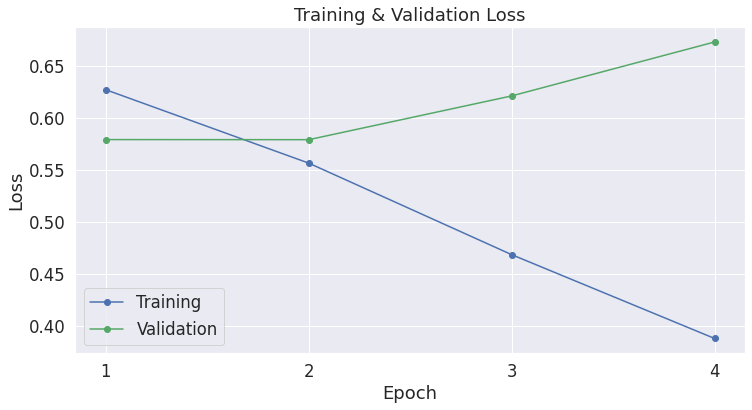

In [ ]:
import matplotlib.pyplot as plt
#% matplotlib inline

import seaborn as sns

# Use plot styling from seaborn.
sns.set(style='darkgrid')

# Increase the plot size and font size.
sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (12,6)

# Plot the learning curve.
plt.plot(df_stats['Training Loss'], 'b-o', label="Training")
plt.plot(df_stats['Valid. Loss'], 'g-o', label="Validation")

# Label the plot.
plt.title("Training & Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.xticks([1, 2, 3, 4])

plt.show()

In [ ]:
#performance on test set


# Report the number of sentences.
print('Number of test sentences: {:,}\n'.format(testing_data.shape[0]))

# Create sentence and label lists
sentences = testing_data.text.values
labels = testing_data.label.values

# Tokenize all of the sentences and map the tokens to thier word IDs.
input_ids = []
attention_masks = []

# For every sentence...
for sent in sentences:
    # `encode_plus` will:
    #   (1) Tokenize the sentence.
    #   (2) Prepend the `[CLS]` token to the start.
    #   (3) Append the `[SEP]` token to the end.
    #   (4) Map tokens to their IDs.
    #   (5) Pad or truncate the sentence to `max_length`
    #   (6) Create attention masks for [PAD] tokens.
    encoded_dict = tokenizer.encode_plus(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = 64,           # Pad & truncate all sentences.
                        pad_to_max_length = True,
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',     # Return pytorch tensors.
                   )
    
    # Add the encoded sentence to the list.    
    input_ids.append(encoded_dict['input_ids'])
    
    # And its attention mask (simply differentiates padding from non-padding).
    attention_masks.append(encoded_dict['attention_mask'])

# Convert the lists into tensors.
input_ids = torch.cat(input_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)
labels = torch.tensor(labels)

# Set the batch size.  
batch_size = 16  

# Create the DataLoader.
prediction_data = TensorDataset(input_ids, attention_masks, labels)
prediction_sampler = SequentialSampler(prediction_data)
prediction_dataloader = DataLoader(prediction_data, sampler=prediction_sampler, batch_size=batch_size)

Number of test sentences: 1,000



/usr/local/lib/python3.9/dist-packages/transformers/tokenization_utils_base.py:2339: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


In [ ]:
#Evaluate on test set

# Prediction on test set

print('Predicting labels for {:,} test sentences...'.format(len(input_ids)))

# Put model in evaluation mode
model.eval()

# Tracking variables 
predictions , true_labels = [], []

# Predict 
for batch in prediction_dataloader:
  # Add batch to GPU
  batch = tuple(t.to(device) for t in batch)
  
  # Unpack the inputs from our dataloader
  b_input_ids, b_input_mask, b_labels = batch
  
  # Telling the model not to compute or store gradients, saving memory and 
  # speeding up prediction
  with torch.no_grad():
      # Forward pass, calculate logit predictions.
      result = model(b_input_ids, 
                     token_type_ids=None, 
                     attention_mask=b_input_mask,
                     return_dict=True)

  logits = result.logits

  # Move logits and labels to CPU
  logits = logits.detach().cpu().numpy()
  label_ids = b_labels.to('cpu').numpy()
  
  # Store predictions and true labels
  predictions.append(logits)
  true_labels.append(label_ids)

print('    DONE.')

Predicting labels for 1,000 test sentences...
    DONE.


In [ ]:
print('Positive samples: %d of %d (%.2f%%)' % (testing_data.label.sum(), len(testing_data.label), (testing_data.label.sum() / len(testing_data.label) * 100.0)))

Positive samples: 506 of 1000 (50.60%)


In [ ]:
from sklearn.metrics import matthews_corrcoef

matthews_set = []

# Evaluate each test batch using Matthew's correlation coefficient
print('Calculating Matthews Corr. Coef. for each batch...')

# For each input batch...
for i in range(len(true_labels)):
  
  # The predictions for this batch are a 2-column ndarray (one column for "0" 
  # and one column for "1"). Pick the label with the highest value and turn this
  # in to a list of 0s and 1s.
  pred_labels_i = np.argmax(predictions[i], axis=1).flatten()
  
  # Calculate and store the coef for this batch.  
  matthews = matthews_corrcoef(true_labels[i], pred_labels_i)                
  matthews_set.append(matthews)

Calculating Matthews Corr. Coef. for each batch...


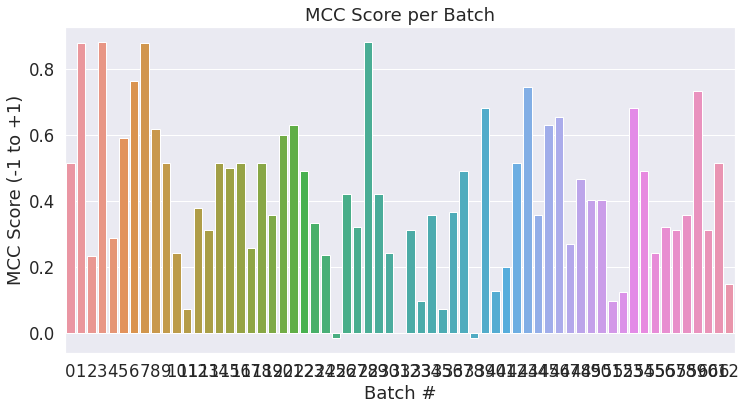

In [ ]:
# Create a barplot showing the MCC score for each batch of test samples.
ax = sns.barplot(x=list(range(len(matthews_set))), y=matthews_set, ci=None)

plt.title('MCC Score per Batch')
plt.ylabel('MCC Score (-1 to +1)')
plt.xlabel('Batch #')

plt.show()

In [ ]:
# Combine the results across all batches. 
flat_predictions = np.concatenate(predictions, axis=0)

# For each sample, pick the label (0 or 1) with the higher score.
flat_predictions = np.argmax(flat_predictions, axis=1).flatten()

# Combine the correct labels for each batch into a single list.
flat_true_labels = np.concatenate(true_labels, axis=0)

# Calculate the MCC
mcc = matthews_corrcoef(flat_true_labels, flat_predictions)

print('Total MCC: %.3f' % mcc)

Total MCC: 0.419


## Confidence interval for BERT model!

In [ ]:
f1_ci = f1_conf_int(flat_true_labels, flat_predictions) #gives mean, lower ci, upper ci, std
f1_ci

[0.7079153835084101,
 0.6820139852953022,
 0.7340561449301466,
 0.01358083290143235]

In [ ]:
type(f1_ci)

list

In [ ]:
df_f1_ci = pd.DataFrame(f1_ci)
df_f1_ci.to_csv(path+'BERT_stats/sample'+str(n)+'_'+str(int(p0*100))+str(int(p1*100))+'_split_models_bert_f1_ci.csv', index= True)
df_f1_ci.head()

,0
0,0.707915
1,0.682014
2,0.734056
3,0.013581


In [ ]:
f1_score(flat_true_labels, flat_predictions)

0.7236467236467237

In [ ]:
class_0_f1 = class_0_f1_conf_int(flat_true_labels, flat_predictions)
class_0_f1

[0.6915911711814189,
 0.658484149877305,
 0.7206862360819537,
 0.016511272594347832]

In [ ]:
class_1_f1 = class_1_f1_conf_int(flat_true_labels, flat_predictions)
class_1_f1

[0.7245100739572302,
 0.6915968801313629,
 0.7558502668789211,
 0.016146121739282336]

5000 50/50

f1_conf_int 
[0.6782077663945831,
 0.6447293552407188,
 0.7100651048150177,
 0.017504373467827822]

 class 0
 [0.6458663948832314, 0.605062167999533, 0.682624914456986, 0.01904222235388316]

 class 1
 [0.6781073266182664, 0.642139532427422, 0.710786372925931, 0.0175216286920552]

 AUC: 0.6625074010657535
 

In [ ]:
print(classification_report(flat_true_labels, flat_predictions))

              precision    recall  f1-score   support

           0       0.72      0.66      0.69       494
           1       0.70      0.75      0.72       506

    accuracy                           0.71      1000
   macro avg       0.71      0.71      0.71      1000
weighted avg       0.71      0.71      0.71      1000



In [ ]:
'''bert_report = classification_report(flat_true_labels, flat_predictions, output_dict=True) 
df_bert = pd.DataFrame(bert_report).transpose()
df_bert.to_csv(path+'BERT_stats/sample'+str(n)+'_'+str(int(p0*100))+str(int(p1*100))+'_split_models_classification_report.csv', index= True)
df_bert.head()'''

"bert_report = classification_report(flat_true_labels, flat_predictions, output_dict=True) \ndf_bert = pd.DataFrame(bert_report).transpose()\ndf_bert.to_csv(path+'BERT_stats/sample'+str(n)+'_'+str(int(p0*100))+str(int(p1*100))+'_split_models_classification_report.csv', index= True)\ndf_bert.head()"

In [ ]:
#TRY THIS

fpr, tpr, thresholds = roc_curve(flat_true_labels, flat_predictions)
roc_auc = auc(fpr, tpr)
print('AUC:', roc_auc) 


AUC: 0.7084660191067513


In [ ]:
roc_auc 

#5000 50/50 = 0.6625074010657535
#4000 50/50 = 0.6834454701924582


0.7084660191067513

In [ ]:
type(roc_auc)

numpy.float64

In [ ]:
auc_list = []
auc_list.append(roc_auc)

In [ ]:
auc_list

[0.7084660191067513]

In [ ]:
df_auc = pd.DataFrame(auc_list)
df_auc.to_csv(path+'BERT_stats/sample'+str(n)+'_'+str(int(p0*100))+str(int(p1*100))+'_split_models_bert_auc.csv', index= True)
df_auc.head()

,0
0,0.708466


In [ ]:
#saving model - ncan do adhoc

'''import os

# Saving best-practices: if you use defaults names for the model, you can reload it using from_pretrained()

output_dir = 'gdrive/My Drive/sample_size/BERT_stats'

# Create output directory if needed
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

print("Saving model to %s" % output_dir)

# Save a trained model, configuration and tokenizer using `save_pretrained()`.
# They can then be reloaded using `from_pretrained()`
model_to_save = model.module if hasattr(model, 'module') else model  # Take care of distributed/parallel training
model_to_save.save_pretrained(output_dir)
tokenizer.save_pretrained(output_dir)

# Good practice: save your training arguments together with the trained model
# torch.save(args, os.path.join(output_dir, 'training_args.bin'))'''

'import os\n\n# Saving best-practices: if you use defaults names for the model, you can reload it using from_pretrained()\n\noutput_dir = \'gdrive/My Drive/sample_size/BERT_stats\'\n\n# Create output directory if needed\nif not os.path.exists(output_dir):\n    os.makedirs(output_dir)\n\nprint("Saving model to %s" % output_dir)\n\n# Save a trained model, configuration and tokenizer using `save_pretrained()`.\n# They can then be reloaded using `from_pretrained()`\nmodel_to_save = model.module if hasattr(model, \'module\') else model  # Take care of distributed/parallel training\nmodel_to_save.save_pretrained(output_dir)\ntokenizer.save_pretrained(output_dir)\n\n# Good practice: save your training arguments together with the trained model\n# torch.save(args, os.path.join(output_dir, \'training_args.bin\'))'

In [ ]:
#file sizes - can check adhoc
'''
!ls -l --block-size=K 'gdrive/My Drive/sample_size/'
'''

"\n!ls -l --block-size=K 'gdrive/My Drive/sample_size/'\n"

In [ ]:
'''
!ls -l --block-size=M 'gdrive/My Drive/sample_size/pytorch_model.bin'
'''

"\n!ls -l --block-size=M 'gdrive/My Drive/sample_size/pytorch_model.bin'\n"

In [ ]:
'''
model = torch.load('gdrive/My Drive/sample_size/pytorch_model.bin')
'''

"\nmodel = torch.load('gdrive/My Drive/sample_size/pytorch_model.bin')\n"

# 5. Non-BERT classifiers

https://github.com/vijayaiitk/NLP-text-classification-model/blob/main/NLP%20text%20classification%20model%20Github.ipynb


https://medium.com/analytics-vidhya/nlp-tutorial-for-text-classification-in-python-8f19cd17b49e#:~:text=Text%20classification%20is%20one%20of,in%20a%20cost%2Deffective%20manner.

In [4610]:
#you can download the data from https://www.kaggle.com/c/nlp-getting-started/data

#os.chdir('/Users/ranivija/Desktop/')
#df_train=pd.read_csv('train.csv')
#df_train=pd.read_csv('gdrive/My Drive/sample_size/5000_data_for_classifier.csv')#5000 docs

df_train = training_data
print(df_train.shape)
df_train.head()

(160, 9)


,Unnamed: 0,subject_id,icd9_code,gender,dob,ethnicity,text,no_of_docs,label
5277,3690,17193,25000,M,2044-05-12 00:00:00,ASIAN - CHINESE,[**2119-10-18**] 3:44 PM\n CT CHEST W/O CONTRA...,36,1
5260,2367,8967,25000,F,2063-10-29 00:00:00,UNKNOWN/NOT SPECIFIED,Admission Date: [**2116-3-2**] Discharg...,32,1
9460,431,2457,25000,F,2060-02-16 00:00:00,HISPANIC OR LATINO,Admission Date: [**2139-10-29**] ...,18,1
1066,3381,18167,25000,F,2062-02-15 00:00:00,UNKNOWN/NOT SPECIFIED,"CCU Nursing Progress Note 7p-7a\nS: ""I am okay...",42,1
2949,3083,27402,25000,M,2045-01-01 00:00:00,ASIAN,"Neuro:Alert/oriented x3,MAE,PERRL. Patient spe...",44,1


In [4611]:
# CLASS DISTRIBUTION
#if dataset is balanced or not
#x=df_train['target'].value_counts()
x=df_train['label'].value_counts()
print(x)
#sns.barplot(x.index, x)

1    158
0      2
Name: label, dtype: int64


In [4612]:
#Missing values
df_train.isna().sum()

/usr/local/lib/python3.10/dist-packages/IPython/core/displayhook.py:275: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  warn('Output cache limit (currently {sz} entries) hit.\n'


Unnamed: 0    0
subject_id    0
icd9_code     0
gender        0
dob           0
ethnicity     0
text          0
no_of_docs    0
label         0
dtype: int64

In [4613]:
#1. WORD-COUNT
df_train['word_count'] = df_train['text'].apply(lambda x: len(str(x).split()))
#print(df_train[df_train['target']==1]['word_count'].mean()) #Disaster tweets
#print(df_train[df_train['target']==0]['word_count'].mean()) #Non-Disaster tweets
#Disaster tweets are more wordy than the non-disaster tweets
print("Diabetes word count: ", df_train[df_train['label']==1]['word_count'].mean()) #HTN
print("Non-Diabetes word count: ", df_train[df_train['label']==0]['word_count'].mean()) #Non-HTN

#2. CHARACTER-COUNT
df_train['char_count'] = df_train['text'].apply(lambda x: len(str(x)))
#print(df_train[df_train['target']==1]['char_count'].mean()) #Disaster tweets
#print(df_train[df_train['target']==0]['char_count'].mean()) #Non-Disaster tweets
#Disaster tweets are longer than the non-disaster tweets
print("Diabetes char count: ",df_train[df_train['label']==1]['char_count'].mean()) #HTN
print("Non-Diabetes char count: ",df_train[df_train['label']==0]['char_count'].mean()) #Non-HTN

#3. UNIQUE WORD-COUNT
df_train['unique_word_count'] = df_train['text'].apply(lambda x: len(set(str(x).split())))
#print(df_train[df_train['target']==1]['unique_word_count'].mean()) #Disaster tweets
#print(df_train[df_train['target']==0]['unique_word_count'].mean()) #Non-Disaster tweets
print("Diabetes unique word count: ",df_train[df_train['label']==1]['unique_word_count'].mean()) #HTN
print("Non-Diabetes unique word count: ",df_train[df_train['label']==0]['unique_word_count'].mean()) #Non-HTN

Diabetes word count:  280.45569620253167
Non-Diabetes word count:  137.5
Diabetes char count:  1998.9493670886077
Non-Diabetes char count:  993.0
Diabetes unique word count:  174.37974683544303
Non-Diabetes unique word count:  95.0


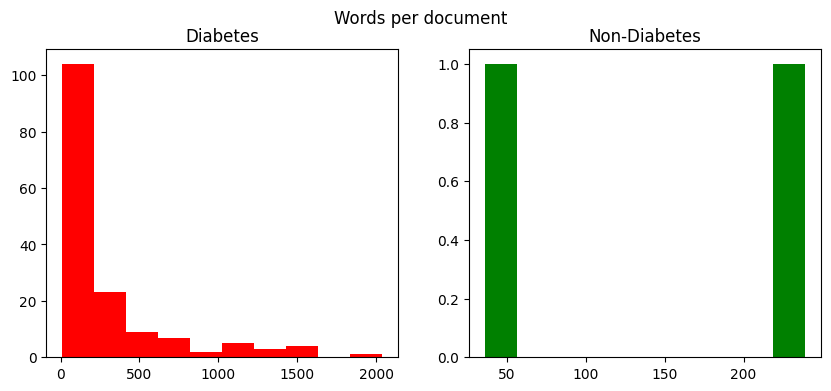

In [4614]:
#Plotting word-count per tweet
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,4))
#train_words=df_train[df_train['target']==1]['word_count']
train_words=df_train[df_train['label']==1]['word_count']
ax1.hist(train_words,color='red')
#ax1.set_title('Disaster Tweets')
ax1.set_title('Diabetes')
#train_words=df_train[df_train['target']==0]['word_count']
train_words=df_train[df_train['label']==0]['word_count']
ax2.hist(train_words,color='green')
#ax2.set_title('Non-Disaster Tweets')
ax2.set_title('Non-Diabetes')
#fig.suptitle('Words per tweet')
fig.suptitle('Words per document')
plt.show()

In [4615]:
#1. Common text preprocessing
text = "   This is a message to be cleaned. It may involve some things like: <br>, ?, :, ''  adjacent spaces and tabs     .  "

#convert to lowercase and remove punctuations and characters and then strip
def preprocess(text):
    text = text.lower() #lowercase text
    text=text.strip()  #get rid of leading/trailing whitespace 
    text=re.compile('<.*?>').sub('', text) #Remove HTML tags/markups
    text = re.compile('[%s]' % re.escape(string.punctuation)).sub(' ', text)  #Replace punctuation with space. Careful since punctuation can sometime be useful
    text = re.sub('\s+', ' ', text)  #Remove extra space and tabs
    text = re.sub(r'\[[0-9]*\]',' ',text) #[0-9] matches any digit (0 to 10000...)
    text=re.sub(r'[^\w\s]', '', str(text).lower().strip())
    text = re.sub(r'\d',' ',text) #matches any digit from 0 to 100000..., \D matches non-digits
    text = re.sub(r'\s+',' ',text) #\s matches any whitespace, \s+ matches multiple whitespace, \S matches non-whitespace 
    
    return text

text=preprocess(text)
print(text)  #text is a string

this is a message to be cleaned it may involve some things like adjacent spaces and tabs


In [4616]:
#3. LEXICON-BASED TEXT PROCESSING EXAMPLES
 
#1. STOPWORD REMOVAL
def stopword(string):
    a= [i for i in string.split() if i not in stopwords.words('english')]
    return ' '.join(a)

text=stopword(text)
print(text)

#2. STEMMING
 
# Initialize the stemmer
snow = SnowballStemmer('english')
def stemming(string):
    a=[snow.stem(i) for i in word_tokenize(string) ]
    return " ".join(a)
text=stemming(text)
print(text)

#3. LEMMATIZATION
# Initialize the lemmatizer
wl = WordNetLemmatizer()
 
# This is a helper function to map NTLK position tags
# Full list is available here: https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

# Tokenize the sentence
def lemmatizer(string):
    word_pos_tags = nltk.pos_tag(word_tokenize(string)) # Get position tags
    a=[wl.lemmatize(tag[0], get_wordnet_pos(tag[1])) for idx, tag in enumerate(word_pos_tags)] # Map the position tag and lemmatize the word/token
    return " ".join(a)

text = lemmatizer(text)
print(text)

message cleaned may involve things like adjacent spaces tabs
messag clean may involv thing like adjac space tab
messag clean may involv thing like adjac space tab


In [4617]:
#FINAL PREPROCESSING
def finalpreprocess(string):
    return lemmatizer(stopword(preprocess(string)))

df_train['clean_text'] = df_train['text'].apply(lambda x: finalpreprocess(x))
df_train=df_train.drop(columns=['word_count','char_count','unique_word_count'])
df_train.head()

,Unnamed: 0,subject_id,icd9_code,gender,dob,ethnicity,text,no_of_docs,label,clean_text
5277,3690,17193,25000,M,2044-05-12 00:00:00,ASIAN - CHINESE,[**2119-10-18**] 3:44 PM\n CT CHEST W/O CONTRA...,36,1,pm ct chest w contrast clip clip number radiol...
5260,2367,8967,25000,F,2063-10-29 00:00:00,UNKNOWN/NOT SPECIFIED,Admission Date: [**2116-3-2**] Discharg...,32,1,admission date discharge date date birth sex f...
9460,431,2457,25000,F,2060-02-16 00:00:00,HISPANIC OR LATINO,Admission Date: [**2139-10-29**] ...,18,1,admission date discharge date date birth sex f...
1066,3381,18167,25000,F,2062-02-15 00:00:00,UNKNOWN/NOT SPECIFIED,"CCU Nursing Progress Note 7p-7a\nS: ""I am okay...",42,1,ccu nursing progress note p okay nurse please ...
2949,3083,27402,25000,M,2045-01-01 00:00:00,ASIAN,"Neuro:Alert/oriented x3,MAE,PERRL. Patient spe...",44,1,neuro alert orient x mae perrl patient speak v...


In [4618]:
# create Word2vec model
#here words_f should be a list containing words from each document. say 1st row of the list is words from the 1st document/sentence
#length of words_f is number of documents/sentences in your dataset
df_train['clean_text_tok']=[nltk.word_tokenize(i) for i in df_train['clean_text']] #convert preprocessed sentence to tokenized sentence
model = Word2Vec(df_train['clean_text_tok'],min_count=1)  #min_count=1 means word should be present at least across all documents,
#if min_count=2 means if the word is present less than 2 times across all the documents then we shouldn't consider it


w2v = dict(zip(model.wv.index_to_key, model.wv.vectors))  #combination of word and its vector - it was model.wv.syn0 which is now deprecated so replaced with model.wv.vectors (may 2023)

#for converting sentence to vectors/numbers from word vectors result by Word2Vec
class MeanEmbeddingVectorizer(object):
    def __init__(self, word2vec):
        self.word2vec = word2vec
        # if a text is empty we should return a vector of zeros
        # with the same dimensionality as all the other vectors
        self.dim = len(next(iter(word2vec.values())))

    def fit(self, X, y):
        return self

    def transform(self, X):
        return np.array([
            np.mean([self.word2vec[w] for w in words if w in self.word2vec]
                    or [np.zeros(self.dim)], axis=0)
            for words in X
        ])


In [4619]:
#SPLITTING THE TRAINING DATASET INTO TRAINING AND VALIDATION
 
# Input: "reviewText", "rating" and "time"
# Target: "log_votes"
X_train, X_val, y_train, y_val = train_test_split(df_train["clean_text"],
                                                  #df_train["target"],
                                                  df_train["label"],
                                                  test_size=0.2,
                                                  shuffle=True)
X_train_tok= [nltk.word_tokenize(i) for i in X_train]  #for word2vec
X_val_tok= [nltk.word_tokenize(i) for i in X_val]      #for word2vec

#TF-IDF
# Convert x_train to vector since model can only run on numbers and not words- Fit and transform
tfidf_vectorizer = TfidfVectorizer(use_idf=True)
X_train_vectors_tfidf = tfidf_vectorizer.fit_transform(X_train) #tfidf runs on non-tokenized sentences unlike word2vec
# Only transform x_test (not fit and transform)
X_val_vectors_tfidf = tfidf_vectorizer.transform(X_val) #Don't fit() your TfidfVectorizer to your test data: it will 
#change the word-indexes & weights to match test data. Rather, fit on the training data, then use the same train-data-
#fit model on the test data, to reflect the fact you're analyzing the test data only based on what was learned without 
#it, and the have compatible


#Word2vec
# Fit and transform
modelw = MeanEmbeddingVectorizer(w2v)
X_train_vectors_w2v = modelw.transform(X_train_tok)
X_val_vectors_w2v = modelw.transform(X_val_tok)

In [4620]:
#Diana's code - can do the same for precision ci and recall ci using precision_score and recall_score (first import them) instead of f1_score

def f1_conf_int(target, predict, bootstrap_n = 500):
    n = len(target)
    f1 = np.zeros(bootstrap_n)
    for bs in np.arange(bootstrap_n):
        i = np.random.choice(n, n, replace = True)
        tp = pd.DataFrame({"t": target, "p": predict})
        tp_bootstrap = tp.iloc[i, :]
        f1[bs] = (f1_score(tp_bootstrap["t"], tp_bootstrap["p"], average='weighted'))
    res = [f1.mean(), np.quantile(f1,0.025), np.quantile(f1,0.975), f1.std()]
    return res

def precision_conf_int(target, predict, bootstrap_n = 500):
    n = len(target)
    p = np.zeros(bootstrap_n)
    for bs in np.arange(bootstrap_n):
        i = np.random.choice(n, n, replace = True)
        tp = pd.DataFrame({"t": target, "p": predict})
        tp_bootstrap = tp.iloc[i, :]
        p[bs] = (precision_score(tp_bootstrap["t"], tp_bootstrap["p"], average='weighted'))
    res = [p.mean(), np.quantile(p,0.025), np.quantile(p,0.975), p.std()]
    return res
  
def recall_conf_int(target, predict, bootstrap_n = 500):
    n = len(target)
    r = np.zeros(bootstrap_n)
    for bs in np.arange(bootstrap_n):
        i = np.random.choice(n, n, replace = True)
        tp = pd.DataFrame({"t": target, "p": predict})
        tp_bootstrap = tp.iloc[i, :]
        r[bs] = (recall_score(tp_bootstrap["t"], tp_bootstrap["p"], average='weighted'))
    res = [r.mean(), np.quantile(r,0.025), np.quantile(r,0.975), r.std()]
    return res

def class_0_f1_conf_int(target, predict, bootstrap_n = 500):
    n = len(target)
    r = np.zeros(bootstrap_n)
    for bs in np.arange(bootstrap_n):
        i = np.random.choice(n, n, replace = True)
        tp = pd.DataFrame({"t": target, "p": predict})
        tp_bootstrap = tp.iloc[i, :]
        r[bs] = (f1_score(tp_bootstrap["t"], tp_bootstrap["p"], pos_label=0, average='binary'))
    res = [r.mean(), np.quantile(r,0.025), np.quantile(r,0.975), r.std()]
    return res

def class_1_f1_conf_int(target, predict, bootstrap_n = 500):
    n = len(target)
    r = np.zeros(bootstrap_n)
    for bs in np.arange(bootstrap_n):
        i = np.random.choice(n, n, replace = True)
        tp = pd.DataFrame({"t": target, "p": predict})
        tp_bootstrap = tp.iloc[i, :]
        r[bs] = (f1_score(tp_bootstrap["t"], tp_bootstrap["p"], pos_label=1, average='binary'))
    res = [r.mean(), np.quantile(r,0.025), np.quantile(r,0.975), r.std()]
    return res

In [4621]:
#FITTING THE CLASSIFICATION MODEL using Logistic Regression(tf-idf)

lr_tfidf=LogisticRegression(solver = 'liblinear', C=10, penalty = 'l2')
lr_tfidf.fit(X_train_vectors_tfidf, y_train)  #model

#Predict y value for test dataset
y_predict = lr_tfidf.predict(X_val_vectors_tfidf)
y_prob = lr_tfidf.predict_proba(X_val_vectors_tfidf)[:,1]
 
print('            Logistic Regression tf-idf')
print(classification_report(y_val,y_predict))
print('Confusion Matrix:',confusion_matrix(y_val, y_predict))
 
fpr, tpr, thresholds = roc_curve(y_val, y_prob)
roc_auc = auc(fpr, tpr)
print('AUC:', roc_auc)  


            Logistic Regression tf-idf
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        32

    accuracy                           1.00        32
   macro avg       1.00      1.00      1.00        32
weighted avg       1.00      1.00      1.00        32

Confusion Matrix: [[32]]
AUC: nan


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1020: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  warnings.warn(


In [4622]:
f1_conf_int(y_val, y_predict) #gives f1 mean, ci lower, ci upper, std - and weighted average (default is binary)

[1.0, 1.0, 1.0, 0.0]

In [4623]:
list1 = ['f1_mean', 'ci_lower', 'ci_upper' , 'std']

In [4624]:
lrtfidf_f1 = pd.DataFrame(f1_conf_int(y_val, y_predict), index =list1,
                                              columns =['val'])

lrtfidf_f1.head()

,val
f1_mean,1.0
ci_lower,1.0
ci_upper,1.0
std,0.0


In [4625]:
lrtfidf_f1_class0 = pd.DataFrame(class_0_f1_conf_int(y_val, y_predict),index =list1,
                                              columns =['val'])

lrtfidf_f1_class0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics

,val
f1_mean,0.0
ci_lower,0.0
ci_upper,0.0
std,0.0


In [4626]:
lrtfidf_f1_class1 = pd.DataFrame(class_1_f1_conf_int(y_val, y_predict),index =list1,
                                              columns =['val'])

lrtfidf_f1_class1

,val
f1_mean,1.0
ci_lower,1.0
ci_upper,1.0
std,0.0


In [4627]:
precision_conf_int(y_val, y_predict)

[1.0, 1.0, 1.0, 0.0]

In [4628]:
recall_conf_int(y_val, y_predict)

[1.0, 1.0, 1.0, 0.0]

In [4629]:
lr_tfidf_report = classification_report(y_val,y_predict, output_dict=True) 
df_lr_tfidf = pd.DataFrame(lr_tfidf_report).transpose()
df_lr_tfidf.head()

,precision,recall,f1-score,support
1,1.0,1.0,1.0,32.0
accuracy,1.0,1.0,1.0,1.0
macro avg,1.0,1.0,1.0,32.0
weighted avg,1.0,1.0,1.0,32.0


In [4630]:
auc_list=[]

auc_list.append(roc_auc)
df_lr_tfidf_roc_auc = pd.DataFrame(auc_list, columns=['auc'])


In [4631]:
#FITTING THE CLASSIFICATION MODEL using Naive Bayes(tf-idf)
#It's a probabilistic classifier that makes use of Bayes' Theorem, a rule that uses probability to make predictions based on prior knowledge of conditions that might be related. This algorithm is the most suitable for such large dataset as it considers each feature independently, calculates the probability of each category, and then predicts the category with the highest probability.

nb_tfidf = MultinomialNB()
nb_tfidf.fit(X_train_vectors_tfidf, y_train)  #model

#Predict y value for test dataset
y_predict = nb_tfidf.predict(X_val_vectors_tfidf)
y_prob = nb_tfidf.predict_proba(X_val_vectors_tfidf)[:,1]
 
print('            NB tf-idf')
print(classification_report(y_val,y_predict))
print('Confusion Matrix:',confusion_matrix(y_val, y_predict))
 
fpr, tpr, thresholds = roc_curve(y_val, y_prob)
roc_auc = auc(fpr, tpr)
print('AUC:', roc_auc)  

            NB tf-idf
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        32

    accuracy                           1.00        32
   macro avg       1.00      1.00      1.00        32
weighted avg       1.00      1.00      1.00        32

Confusion Matrix: [[32]]
AUC: nan


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1020: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  warnings.warn(


In [4632]:
f1_conf_int(y_val, y_predict) #gives f1 mean, ci lower, ci upper, std - confirm

[1.0, 1.0, 1.0, 0.0]

In [4633]:
nbtfidf_f1 = pd.DataFrame(f1_conf_int(y_val, y_predict), index =list1,
                                              columns =['val'])

nbtfidf_f1_class0 = pd.DataFrame(class_0_f1_conf_int(y_val, y_predict),index =list1,
                                              columns =['val'])

nbtfidf_f1_class1 = pd.DataFrame(class_1_f1_conf_int(y_val, y_predict),index =list1,
                                              columns =['val'])

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics

In [4634]:
nb_tfidf_report = classification_report(y_val,y_predict, output_dict=True) 
df_nb_tfidf = pd.DataFrame(nb_tfidf_report).transpose()
df_nb_tfidf.head()

,precision,recall,f1-score,support
1,1.0,1.0,1.0,32.0
accuracy,1.0,1.0,1.0,1.0
macro avg,1.0,1.0,1.0,32.0
weighted avg,1.0,1.0,1.0,32.0


In [4635]:
auc_list=[]

auc_list.append(roc_auc)
df_nb_tfidf_roc_auc = pd.DataFrame(auc_list, columns=['auc'])

In [4636]:
#FITTING THE CLASSIFICATION MODEL using Random Forest (tf-idf) ---- try

rf_tfidf = RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0)
rf_tfidf.fit(X_train_vectors_tfidf, y_train)  #model

#Predict y value for test dataset
y_predict = rf_tfidf.predict(X_val_vectors_tfidf)
y_prob = rf_tfidf.predict_proba(X_val_vectors_tfidf)[:,1]
 
print('            RF tf-idf')
print(classification_report(y_val,y_predict))
print('Confusion Matrix:',confusion_matrix(y_val, y_predict))
 
fpr, tpr, thresholds = roc_curve(y_val, y_prob)
roc_auc = auc(fpr, tpr)
print('AUC:', roc_auc)  

            RF tf-idf
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        32

    accuracy                           1.00        32
   macro avg       1.00      1.00      1.00        32
weighted avg       1.00      1.00      1.00        32

Confusion Matrix: [[32]]
AUC: nan


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1020: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  warnings.warn(


In [4637]:
f1_conf_int(y_val, y_predict) #gives f1 mean, ci lower, ci upper, std - confirm

[1.0, 1.0, 1.0, 0.0]

In [4638]:
rf_tfidf_report = classification_report(y_val,y_predict, output_dict=True) 
df_rf_tfidf = pd.DataFrame(rf_tfidf_report).transpose()
df_rf_tfidf.head()

,precision,recall,f1-score,support
1,1.0,1.0,1.0,32.0
accuracy,1.0,1.0,1.0,1.0
macro avg,1.0,1.0,1.0,32.0
weighted avg,1.0,1.0,1.0,32.0


In [4639]:
rftfidf_f1 = pd.DataFrame(f1_conf_int(y_val, y_predict), index =list1,
                                              columns =['val'])


rftfidf_f1_class0 = pd.DataFrame(class_0_f1_conf_int(y_val, y_predict),index =list1,
                                              columns =['val'])

rftfidf_f1_class1 = pd.DataFrame(class_1_f1_conf_int(y_val, y_predict),index =list1,
                                              columns =['val'])

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics

In [4640]:
auc_list=[]

auc_list.append(roc_auc)
df_rf_tfidf_roc_auc = pd.DataFrame(auc_list, columns=['auc'])

In [4641]:
#FITTING THE CLASSIFICATION MODEL using Decision Tree (tf-idf) ---- try

dt_tfidf = DecisionTreeClassifier()
dt_tfidf.fit(X_train_vectors_tfidf, y_train)  #model

#Predict y value for test dataset
y_predict = dt_tfidf.predict(X_val_vectors_tfidf)
y_prob = dt_tfidf.predict_proba(X_val_vectors_tfidf)[:,1]
 
print('            Decision Tree tf-idf')
print(classification_report(y_val,y_predict))
print('Confusion Matrix:',confusion_matrix(y_val, y_predict))
 
fpr, tpr, thresholds = roc_curve(y_val, y_prob)
roc_auc = auc(fpr, tpr)
print('AUC:', roc_auc)  

            Decision Tree tf-idf
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        32

    accuracy                           1.00        32
   macro avg       1.00      1.00      1.00        32
weighted avg       1.00      1.00      1.00        32

Confusion Matrix: [[32]]
AUC: nan


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1020: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  warnings.warn(


In [4642]:
f1_conf_int(y_val, y_predict) #gives f1 mean, ci lower, ci upper, std - confirm

[1.0, 1.0, 1.0, 0.0]

In [4643]:
dttfidf_f1 = pd.DataFrame(f1_conf_int(y_val, y_predict), index =list1,
                                              columns =['val'])

dttfidf_f1_class0 = pd.DataFrame(class_0_f1_conf_int(y_val, y_predict),index =list1,
                                              columns =['val'])

dttfidf_f1_class1 = pd.DataFrame(class_1_f1_conf_int(y_val, y_predict),index =list1,
                                              columns =['val'])

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics

In [4644]:
dt_tfidf_report = classification_report(y_val,y_predict, output_dict=True) 
df_dt_tfidf = pd.DataFrame(dt_tfidf_report).transpose()
df_dt_tfidf.head()

,precision,recall,f1-score,support
1,1.0,1.0,1.0,32.0
accuracy,1.0,1.0,1.0,1.0
macro avg,1.0,1.0,1.0,32.0
weighted avg,1.0,1.0,1.0,32.0


In [4645]:
auc_list=[]

auc_list.append(roc_auc)
df_dt_tfidf_roc_auc = pd.DataFrame(auc_list, columns=['auc'])

In [4646]:
#FITTING THE CLASSIFICATION MODEL using SVC (tf-idf) ---- try

svc_tfidf = SVC(probability=True)
svc_tfidf.fit(X_train_vectors_tfidf, y_train)  #model

#Predict y value for test dataset
y_predict = svc_tfidf.predict(X_val_vectors_tfidf)
y_prob = svc_tfidf.predict_proba(X_val_vectors_tfidf)[:,1]
 
print('                SVC tf-idf')
print(classification_report(y_val,y_predict))
print('Confusion Matrix:',confusion_matrix(y_val, y_predict))
 
fpr, tpr, thresholds = roc_curve(y_val, y_prob)
roc_auc = auc(fpr, tpr)
print('AUC:', roc_auc)  

                SVC tf-idf
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        32

    accuracy                           1.00        32
   macro avg       1.00      1.00      1.00        32
weighted avg       1.00      1.00      1.00        32

Confusion Matrix: [[32]]
AUC: nan


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1020: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  warnings.warn(


In [4647]:
f1_conf_int(y_val, y_predict) #gives f1 mean, ci lower, ci upper, std - confirm

[1.0, 1.0, 1.0, 0.0]

In [4648]:
svctfidf_f1 = pd.DataFrame(f1_conf_int(y_val, y_predict), index =list1,
                                              columns =['val'])

svctfidf_f1_class0 = pd.DataFrame(class_0_f1_conf_int(y_val, y_predict),index =list1,
                                              columns =['val'])

svctfidf_f1_class1 = pd.DataFrame(class_1_f1_conf_int(y_val, y_predict),index =list1,
                                              columns =['val'])

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics

In [4649]:
svc_tfidf_report = classification_report(y_val,y_predict, output_dict=True) 
df_svc_tfidf = pd.DataFrame(svc_tfidf_report).transpose()
df_svc_tfidf.head()

,precision,recall,f1-score,support
1,1.0,1.0,1.0,32.0
accuracy,1.0,1.0,1.0,1.0
macro avg,1.0,1.0,1.0,32.0
weighted avg,1.0,1.0,1.0,32.0


In [4650]:
auc_list=[]

auc_list.append(roc_auc)
df_svc_tfidf_roc_auc = pd.DataFrame(auc_list, columns=['auc'])

In [4651]:
#FITTING THE CLASSIFICATION MODEL using Linear SVC (tf-idf) ---- try

lsvc_tfidf = LinearSVC(multi_class='ovr', C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
      penalty='l2', random_state=0, tol=1e-05, verbose=0)
lsvc_tfidf.fit(X_train_vectors_tfidf, y_train)  #model

#Predict y value for test dataset
y_predict = lsvc_tfidf.predict(X_val_vectors_tfidf)
y_prob = lsvc_tfidf._predict_proba_lr(X_val_vectors_tfidf)[:,1]
 
print('               Linear SVC tf-idf')
print(classification_report(y_val,y_predict))
print('Confusion Matrix:',confusion_matrix(y_val, y_predict))
 
fpr, tpr, thresholds = roc_curve(y_val, y_prob)
roc_auc = auc(fpr, tpr)
print('AUC:', roc_auc) 

               Linear SVC tf-idf
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        32

    accuracy                           1.00        32
   macro avg       1.00      1.00      1.00        32
weighted avg       1.00      1.00      1.00        32

Confusion Matrix: [[32]]
AUC: nan


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1020: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  warnings.warn(


In [4652]:
f1_conf_int(y_val, y_predict) #gives f1 mean, ci lower, ci upper, std - confirm

[1.0, 1.0, 1.0, 0.0]

In [4653]:
lsvctfidf_f1 = pd.DataFrame(f1_conf_int(y_val, y_predict), index =list1,
                                              columns =['val'])

lsvctfidf_f1_class0 = pd.DataFrame(class_0_f1_conf_int(y_val, y_predict),index =list1,
                                              columns =['val'])

lsvctfidf_f1_class1 = pd.DataFrame(class_1_f1_conf_int(y_val, y_predict),index =list1,
                                              columns =['val'])

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics

In [4654]:
lsvc_tfidf_report = classification_report(y_val,y_predict, output_dict=True) 
df_lsvc_tfidf = pd.DataFrame(lsvc_tfidf_report).transpose()
df_lsvc_tfidf.head()

,precision,recall,f1-score,support
1,1.0,1.0,1.0,32.0
accuracy,1.0,1.0,1.0,1.0
macro avg,1.0,1.0,1.0,32.0
weighted avg,1.0,1.0,1.0,32.0


In [4655]:
auc_list=[]

auc_list.append(roc_auc)
df_lsvc_tfidf_roc_auc = pd.DataFrame(auc_list, columns=['auc'])

In [4656]:
#FITTING THE CLASSIFICATION MODEL using SGD (tf-idf) ---- try

from sklearn.calibration import CalibratedClassifierCV

sgd_tfidf = SGDClassifier(loss='hinge',class_weight='balanced')
clf = sgd_tfidf.fit(X_train_vectors_tfidf, y_train)  #model

calibrator = CalibratedClassifierCV(clf, cv='prefit')
model=calibrator.fit(X_train_vectors_tfidf, y_train)

#Predict y value for test dataset
y_predict = model.predict(X_val_vectors_tfidf)
y_prob = model.predict_proba(X_val_vectors_tfidf)[:,1]

print('                 SGD tf-idf')
print(classification_report(y_val,y_predict))
print('Confusion Matrix:',confusion_matrix(y_val, y_predict))
 
fpr, tpr, thresholds = roc_curve(y_val, y_prob)
roc_auc = auc(fpr, tpr)
print('AUC:', roc_auc)  

                 SGD tf-idf
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        32

    accuracy                           1.00        32
   macro avg       1.00      1.00      1.00        32
weighted avg       1.00      1.00      1.00        32

Confusion Matrix: [[32]]
AUC: nan


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1020: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  warnings.warn(


In [4657]:
f1_conf_int(y_val, y_predict) #gives f1 mean, ci lower, ci upper, std - confirm

[1.0, 1.0, 1.0, 0.0]

In [4658]:
sgdtfidf_f1 = pd.DataFrame(f1_conf_int(y_val, y_predict), index =list1,
                                              columns =['val'])

sgdtfidf_f1_class0 = pd.DataFrame(class_0_f1_conf_int(y_val, y_predict),index =list1,
                                              columns =['val'])

sgdtfidf_f1_class1 = pd.DataFrame(class_1_f1_conf_int(y_val, y_predict),index =list1,
                                              columns =['val'])

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics

In [4659]:
sgd_tfidf_report = classification_report(y_val,y_predict, output_dict=True) 
df_sgd_tfidf = pd.DataFrame(sgd_tfidf_report).transpose()
df_sgd_tfidf.head()

,precision,recall,f1-score,support
1,1.0,1.0,1.0,32.0
accuracy,1.0,1.0,1.0,1.0
macro avg,1.0,1.0,1.0,32.0
weighted avg,1.0,1.0,1.0,32.0


In [4660]:
auc_list=[]

auc_list.append(roc_auc)
df_sgd_tfidf_roc_auc = pd.DataFrame(auc_list, columns=['auc'])

In [4661]:
#FITTING THE CLASSIFICATION MODEL using K neighbours (tf-idf) ---- try

kn_tfidf = KNeighborsClassifier()
kn = kn_tfidf.fit(X_train_vectors_tfidf, y_train)  #model

calibrator = CalibratedClassifierCV(kn, cv='prefit')
model=calibrator.fit(X_train_vectors_tfidf, y_train) 

#Predict y value for test dataset
y_predict = model.predict(X_val_vectors_tfidf)
y_prob = model.predict_proba(X_val_vectors_tfidf)[:,1]


print('                 KNN tf-idf')
print(classification_report(y_val,y_predict))
print('Confusion Matrix:',confusion_matrix(y_val, y_predict))
 
fpr, tpr, thresholds = roc_curve(y_val, y_prob)
roc_auc = auc(fpr, tpr)
print('AUC:', roc_auc) 

                 KNN tf-idf
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        32

    accuracy                           1.00        32
   macro avg       1.00      1.00      1.00        32
weighted avg       1.00      1.00      1.00        32

Confusion Matrix: [[32]]
AUC: nan


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1020: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  warnings.warn(


In [4662]:
f1_conf_int(y_val, y_predict) #gives f1 mean, ci lower, ci upper, std - confirm

[1.0, 1.0, 1.0, 0.0]

In [4663]:
knntfidf_f1 = pd.DataFrame(f1_conf_int(y_val, y_predict), index =list1,
                                              columns =['val'])

knntfidf_f1_class0 = pd.DataFrame(class_0_f1_conf_int(y_val, y_predict),index =list1,
                                              columns =['val'])

knntfidf_f1_class1 = pd.DataFrame(class_1_f1_conf_int(y_val, y_predict),index =list1,
                                              columns =['val'])

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics

In [4664]:
knn_tfidf_report = classification_report(y_val,y_predict, output_dict=True) 
df_knn_tfidf = pd.DataFrame(knn_tfidf_report).transpose()
df_knn_tfidf.head()

,precision,recall,f1-score,support
1,1.0,1.0,1.0,32.0
accuracy,1.0,1.0,1.0,1.0
macro avg,1.0,1.0,1.0,32.0
weighted avg,1.0,1.0,1.0,32.0


In [4665]:
auc_list=[]

auc_list.append(roc_auc)
df_knn_tfidf_roc_auc = pd.DataFrame(auc_list, columns=['auc'])

In [4666]:
#FITTING THE CLASSIFICATION MODEL using Logistic Regression (W2v)
model = 'lr_w2v'
lr_w2v=LogisticRegression(solver = 'liblinear', C=10, penalty = 'l2')
lr_w2v.fit(X_train_vectors_w2v, y_train)  #model

#Predict y value for test dataset
y_predict = lr_w2v.predict(X_val_vectors_w2v)
y_prob = lr_w2v.predict_proba(X_val_vectors_w2v)[:,1]
 
print('                 Logistic Regression w2v')
print(classification_report(y_val,y_predict))
print('Confusion Matrix:',confusion_matrix(y_val, y_predict))
 
fpr, tpr, thresholds = roc_curve(y_val, y_prob)
roc_auc = auc(fpr, tpr)
print('AUC:', roc_auc) 



                 Logistic Regression w2v
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        32

    accuracy                           1.00        32
   macro avg       1.00      1.00      1.00        32
weighted avg       1.00      1.00      1.00        32

Confusion Matrix: [[32]]
AUC: nan


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1020: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  warnings.warn(


In [4667]:
f1_conf_int(y_val, y_predict) #gives f1 mean, ci lower, ci upper, std - confirm

[1.0, 1.0, 1.0, 0.0]

In [4668]:
lrw2v_f1 = pd.DataFrame(f1_conf_int(y_val, y_predict), index =list1,
                                              columns =['val'])

In [4669]:
lr_w2v_report = classification_report(y_val,y_predict, output_dict=True) 
df_lr_w2v = pd.DataFrame(lr_w2v_report).transpose()
df_lr_w2v.head()

,precision,recall,f1-score,support
1,1.0,1.0,1.0,32.0
accuracy,1.0,1.0,1.0,1.0
macro avg,1.0,1.0,1.0,32.0
weighted avg,1.0,1.0,1.0,32.0


In [4670]:
auc_list=[]

auc_list.append(roc_auc)
df_lr_w2v_roc_auc = pd.DataFrame(auc_list, columns=['auc'])

Combine all classification reports

In [4671]:
frames=[df_lr_tfidf,df_nb_tfidf, df_rf_tfidf, df_dt_tfidf, df_svc_tfidf, df_lsvc_tfidf, df_sgd_tfidf, df_knn_tfidf, df_lr_w2v]

In [4672]:
result = pd.concat(frames, keys=["lr_tfidf", "nb_tfidf", "rf_tfidf","dt_tfidf","svc_tfidf","lsvc_tfidf","sgd_tfidf","knn_tfidf","lr_w2v"])

In [4673]:
result.head(20)

precision  recall  f1-score  support
lr_tfidf  1                   1.0     1.0       1.0     32.0
          accuracy            1.0     1.0       1.0      1.0
          macro avg           1.0     1.0       1.0     32.0
          weighted avg        1.0     1.0       1.0     32.0
nb_tfidf  1                   1.0     1.0       1.0     32.0
          accuracy            1.0     1.0       1.0      1.0
          macro avg           1.0     1.0       1.0     32.0
          weighted avg        1.0     1.0       1.0     32.0
rf_tfidf  1                   1.0     1.0       1.0     32.0
          accuracy            1.0     1.0       1.0      1.0
          macro avg           1.0     1.0       1.0     32.0
          weighted avg        1.0     1.0       1.0     32.0
dt_tfidf  1                   1.0     1.0       1.0     32.0
          accuracy            1.0     1.0       1.0      1.0
          macro avg           1.0     1.0       1.0     32.0
          weighted avg        1.0     1.0       1.0     32.0
svc_tfidf 1                   1.0     1.0       1.0     32.0
          accuracy            1.0     1.0       1.0      1.0
          macro avg           1.0     1.0       1.0     32.0
          weighted avg        1.0     1.0       1.0     32.0

In [4674]:
result.to_csv(path+'diabetes/classification_and_AUC_reports/sample'+str(n)+'_'+str(int(p0*100))+str(int(p1*100))+'_split_models_classification_report.csv', index= True)

combine all AUC scores

In [4675]:
auc_frames=[df_lr_tfidf_roc_auc,df_nb_tfidf_roc_auc, df_rf_tfidf_roc_auc, df_dt_tfidf_roc_auc, df_svc_tfidf_roc_auc, df_lsvc_tfidf_roc_auc, df_sgd_tfidf_roc_auc, df_knn_tfidf_roc_auc, df_lr_w2v_roc_auc]

In [4676]:
auc_result = pd.concat(auc_frames, keys=["lr_tfidf", "nb_tfidf", "rf_tfidf","dt_tfidf","svc_tfidf","lsvc_tfidf","sgd_tfidf","knn_tfidf","lr_w2v"])

In [4677]:
auc_result

,,auc
lr_tfidf,0,NaN
nb_tfidf,0,NaN
rf_tfidf,0,NaN
dt_tfidf,0,NaN
svc_tfidf,0,NaN
lsvc_tfidf,0,NaN
sgd_tfidf,0,NaN
knn_tfidf,0,NaN
lr_w2v,0,NaN


In [4678]:
auc_result.to_csv(path+'diabetes/classification_and_AUC_reports/sample'+str(n)+'_'+str(int(p0*100))+str(int(p1*100))+'_split_models_auc_report.csv', index= True)

Combine all f1 with CI

In [4679]:
f1_frames=[lrtfidf_f1,nbtfidf_f1, rftfidf_f1, dttfidf_f1, svctfidf_f1, lsvctfidf_f1, sgdtfidf_f1, knntfidf_f1]

In [4680]:
f1_result = pd.concat(f1_frames, keys=["lr_tfidf", "nb_tfidf", "rf_tfidf","dt_tfidf","svc_tfidf","lsvc_tfidf","sgd_tfidf","knn_tfidf"])

In [4681]:
f1_result

val
lr_tfidf   f1_mean   1.0
           ci_lower  1.0
           ci_upper  1.0
           std       0.0
nb_tfidf   f1_mean   1.0
           ci_lower  1.0
           ci_upper  1.0
           std       0.0
rf_tfidf   f1_mean   1.0
           ci_lower  1.0
           ci_upper  1.0
           std       0.0
dt_tfidf   f1_mean   1.0
           ci_lower  1.0
           ci_upper  1.0
           std       0.0
svc_tfidf  f1_mean   1.0
           ci_lower  1.0
           ci_upper  1.0
           std       0.0
lsvc_tfidf f1_mean   1.0
           ci_lower  1.0
           ci_upper  1.0
           std       0.0
sgd_tfidf  f1_mean   1.0
           ci_lower  1.0
           ci_upper  1.0
           std       0.0
knn_tfidf  f1_mean   1.0
           ci_lower  1.0
           ci_upper  1.0
           std       0.0

In [4682]:
f1_result.to_csv(path+'diabetes/classification_and_AUC_reports/sample'+str(n)+'_'+str(int(p0*100))+str(int(p1*100))+'_split_models_f1_report.csv', index= True)

can repeat the same for f1 for each class if needed

# Combine all the simulations into one file (non-BERT)


In [4683]:
#Read all the files - for classification reports


path = 'gdrive/My Drive/sample_size/diabetes/classification_and_AUC_reports/sample'

file_end = '_split_models_classification_report'

df1 = pd.read_csv(path+'200_1090'+file_end+'.csv')
df2 = pd.read_csv(path+'200_2080'+file_end+'.csv')
df3 = pd.read_csv(path+'200_3070'+file_end+'.csv')
df4 = pd.read_csv(path+'200_4060'+file_end+'.csv')
df5 = pd.read_csv(path+'200_5050'+file_end+'.csv')
df6 = pd.read_csv(path+'400_1090'+file_end+'.csv')
df7 = pd.read_csv(path+'400_2080'+file_end+'.csv')
df8 = pd.read_csv(path+'400_3070'+file_end+'.csv')
df9 = pd.read_csv(path+'400_4060'+file_end+'.csv')
df10 = pd.read_csv(path+'400_5050'+file_end+'.csv')
df11 = pd.read_csv(path+'500_1090'+file_end+'.csv')
df12 = pd.read_csv(path+'500_2080'+file_end+'.csv')
df13 = pd.read_csv(path+'500_3070'+file_end+'.csv')
df14 = pd.read_csv(path+'500_4060'+file_end+'.csv')
df15 = pd.read_csv(path+'500_5050'+file_end+'.csv')
df16 = pd.read_csv(path+'600_1090'+file_end+'.csv')
df17 = pd.read_csv(path+'600_2080'+file_end+'.csv')
df18 = pd.read_csv(path+'600_3070'+file_end+'.csv')
df19 = pd.read_csv(path+'600_4060'+file_end+'.csv')
df20 = pd.read_csv(path+'600_5050'+file_end+'.csv')
df21 = pd.read_csv(path+'800_1090'+file_end+'.csv')
df22 = pd.read_csv(path+'800_2080'+file_end+'.csv')
df23 = pd.read_csv(path+'800_3070'+file_end+'.csv')
df24 = pd.read_csv(path+'800_4060'+file_end+'.csv')
df25 = pd.read_csv(path+'800_5050'+file_end+'.csv')
df26 = pd.read_csv(path+'1000_1090'+file_end+'.csv')
df27 = pd.read_csv(path+'1000_2080'+file_end+'.csv')
df28 = pd.read_csv(path+'1000_3070'+file_end+'.csv')
df29 = pd.read_csv(path+'1000_4060'+file_end+'.csv')
df30 = pd.read_csv(path+'1000_5050'+file_end+'.csv')
df31 = pd.read_csv(path+'2000_1090'+file_end+'.csv')
df32 = pd.read_csv(path+'2000_2080'+file_end+'.csv')
df33 = pd.read_csv(path+'2000_3070'+file_end+'.csv')
df34 = pd.read_csv(path+'2000_4060'+file_end+'.csv')
df35 = pd.read_csv(path+'2000_5050'+file_end+'.csv')
df36 = pd.read_csv(path+'3000_1090'+file_end+'.csv')
df37 = pd.read_csv(path+'3000_2080'+file_end+'.csv')
df38 = pd.read_csv(path+'3000_3070'+file_end+'.csv')
df39 = pd.read_csv(path+'3000_4060'+file_end+'.csv')
df40 = pd.read_csv(path+'3000_5050'+file_end+'.csv')
df41 = pd.read_csv(path+'4000_1090'+file_end+'.csv')
df42 = pd.read_csv(path+'4000_2080'+file_end+'.csv')
df43 = pd.read_csv(path+'4000_3070'+file_end+'.csv')
df44 = pd.read_csv(path+'4000_4060'+file_end+'.csv')
df45 = pd.read_csv(path+'4000_5050'+file_end+'.csv')
df46 = pd.read_csv(path+'5000_1090'+file_end+'.csv')
df47 = pd.read_csv(path+'5000_2080'+file_end+'.csv')
df48 = pd.read_csv(path+'5000_3070'+file_end+'.csv')
df49 = pd.read_csv(path+'5000_4060'+file_end+'.csv')
df50 = pd.read_csv(path+'5000_5050'+file_end+'.csv')

df51 = pd.read_csv(path+'5000_595'+file_end+'.csv')
df52 = pd.read_csv(path+'5000_199'+file_end+'.csv')
df53 = pd.read_csv(path+'4000_595'+file_end+'.csv')
df54 = pd.read_csv(path+'4000_199'+file_end+'.csv')
df55 = pd.read_csv(path+'3000_595'+file_end+'.csv')
df56 = pd.read_csv(path+'3000_199'+file_end+'.csv')
df57 = pd.read_csv(path+'2000_595'+file_end+'.csv')
df58 = pd.read_csv(path+'2000_199'+file_end+'.csv')
df59 = pd.read_csv(path+'1000_595'+file_end+'.csv')
df60 = pd.read_csv(path+'1000_199'+file_end+'.csv')
df61 = pd.read_csv(path+'800_595'+file_end+'.csv')
df62 = pd.read_csv(path+'800_199'+file_end+'.csv')
df63 = pd.read_csv(path+'600_595'+file_end+'.csv')
df64 = pd.read_csv(path+'600_199'+file_end+'.csv')
df65 = pd.read_csv(path+'500_595'+file_end+'.csv')
df66 = pd.read_csv(path+'500_199'+file_end+'.csv')
df67 = pd.read_csv(path+'400_595'+file_end+'.csv')
df68 = pd.read_csv(path+'400_199'+file_end+'.csv')
df69 = pd.read_csv(path+'200_595'+file_end+'.csv')
df70 = pd.read_csv(path+'200_199'+file_end+'.csv')

In [4697]:
frames = [df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12, df13, df14, df15, df16, df17, df18, df19, df20, df21, df22, df23, df24, df25, df26, df27, df28, df29, df30, df31, df32, df33, df34, df35, df36, df37, df38, df39, df40, df41, df42, df43, df44, df45, df46, df47, df48, df49, df50, df51, df52, df53, df54, df55, df56, df57, df58, df59, df60, df61, df62, df63, df64, df65, df66, df67, df68, df69, df70]

#frames=[df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12, df13, df14, df15, df16, df17, df18, df19, df20, df21, df22, df23, df24, df25, df26, df27, df28, df29, df30, df31, df32, df33, df34, df35, df36, df37, df38, df39, df40, df41, df42, df43, df44, df45, df46, df47, df48, df49, df50, df51, df52, df53]

In [4698]:
result = pd.concat(frames, keys=['200_1090', '200_2080', '200_3070', '200_4060', '200_5050', '400_1090', '400_2080', '400_3070', '400_4060', '400_5050', '500_1090', 
                                 '500_2080', '500_3070', '500_4060', '500_5050', '600_1090', '600_2080', '600_3070', '600_4060', '600_5050', '800_1090', '800_2080', 
                                 '800_3070', '800_4060', '800_5050', '1000_1090', '1000_2080', '1000_3070', '1000_4060', '1000_5050', '2000_1090', '2000_2080', 
                                 '2000_3070', '2000_4060', '2000_5050', '3000_1090', '3000_2080', '3000_3070', '3000_4060', '3000_5050', '4000_1090', '4000_2080', 
                                 '4000_3070', '4000_4060', '4000_5050', '5000_1090', '5000_2080', '5000_3070', '5000_4060', '5000_5050', '5000_595','5000_199',
                                 '4000_595','4000_199','3000_595','3000_199','2000_595','2000_199','1000_595','1000_199','800_595','800_199','600_595','600_199',
                                 '500_595','500_199','400_595','400_199','200_595','200_199'])



In [4699]:
result

Unnamed: 0    Unnamed: 1  precision  recall  f1-score  support
200_1090 0    lr_tfidf             0   0.000000   0.000  0.000000    4.000
         1    lr_tfidf             1   0.875000   1.000  0.933333   28.000
         2    lr_tfidf      accuracy   0.875000   0.875  0.875000    0.875
         3    lr_tfidf     macro avg   0.437500   0.500  0.466667   32.000
         4    lr_tfidf  weighted avg   0.765625   0.875  0.816667   32.000
...                ...           ...        ...     ...       ...      ...
200_199  31  knn_tfidf  weighted avg   1.000000   1.000  1.000000   32.000
         32     lr_w2v             1   1.000000   1.000  1.000000   32.000
         33     lr_w2v      accuracy   1.000000   1.000  1.000000    1.000
         34     lr_w2v     macro avg   1.000000   1.000  1.000000   32.000
         35     lr_w2v  weighted avg   1.000000   1.000  1.000000   32.000

[3123 rows x 6 columns]

In [4700]:
result.to_csv('gdrive/My Drive/sample_size/diabetes/classification_and_AUC_reports/all_classification_results.csv')

In [4701]:
#Read all the files - for auc reports

path = 'gdrive/My Drive/sample_size/diabetes/classification_and_AUC_reports/sample'
file_end = '_split_models_auc_report'

df1 = pd.read_csv(path+'200_1090'+file_end+'.csv')
df2 = pd.read_csv(path+'200_2080'+file_end+'.csv')
df3 = pd.read_csv(path+'200_3070'+file_end+'.csv')
df4 = pd.read_csv(path+'200_4060'+file_end+'.csv')
df5 = pd.read_csv(path+'200_5050'+file_end+'.csv')
df6 = pd.read_csv(path+'400_1090'+file_end+'.csv')
df7 = pd.read_csv(path+'400_2080'+file_end+'.csv')
df8 = pd.read_csv(path+'400_3070'+file_end+'.csv')
df9 = pd.read_csv(path+'400_4060'+file_end+'.csv')
df10 = pd.read_csv(path+'400_5050'+file_end+'.csv')
df11 = pd.read_csv(path+'500_1090'+file_end+'.csv')
df12 = pd.read_csv(path+'500_2080'+file_end+'.csv')
df13 = pd.read_csv(path+'500_3070'+file_end+'.csv')
df14 = pd.read_csv(path+'500_4060'+file_end+'.csv')
df15 = pd.read_csv(path+'500_5050'+file_end+'.csv')
df16 = pd.read_csv(path+'600_1090'+file_end+'.csv')
df17 = pd.read_csv(path+'600_2080'+file_end+'.csv')
df18 = pd.read_csv(path+'600_3070'+file_end+'.csv')
df19 = pd.read_csv(path+'600_4060'+file_end+'.csv')
df20 = pd.read_csv(path+'600_5050'+file_end+'.csv')
df21 = pd.read_csv(path+'800_1090'+file_end+'.csv')
df22 = pd.read_csv(path+'800_2080'+file_end+'.csv')
df23 = pd.read_csv(path+'800_3070'+file_end+'.csv')
df24 = pd.read_csv(path+'800_4060'+file_end+'.csv')
df25 = pd.read_csv(path+'800_5050'+file_end+'.csv')
df26 = pd.read_csv(path+'1000_1090'+file_end+'.csv')
df27 = pd.read_csv(path+'1000_2080'+file_end+'.csv')
df28 = pd.read_csv(path+'1000_3070'+file_end+'.csv')
df29 = pd.read_csv(path+'1000_4060'+file_end+'.csv')
df30 = pd.read_csv(path+'1000_5050'+file_end+'.csv')
df31 = pd.read_csv(path+'2000_1090'+file_end+'.csv')
df32 = pd.read_csv(path+'2000_2080'+file_end+'.csv')
df33 = pd.read_csv(path+'2000_3070'+file_end+'.csv')
df34 = pd.read_csv(path+'2000_4060'+file_end+'.csv')
df35 = pd.read_csv(path+'2000_5050'+file_end+'.csv')
df36 = pd.read_csv(path+'3000_1090'+file_end+'.csv')
df37 = pd.read_csv(path+'3000_2080'+file_end+'.csv')
df38 = pd.read_csv(path+'3000_3070'+file_end+'.csv')
df39 = pd.read_csv(path+'3000_4060'+file_end+'.csv')
df40 = pd.read_csv(path+'3000_5050'+file_end+'.csv')
df41 = pd.read_csv(path+'4000_1090'+file_end+'.csv')
df42 = pd.read_csv(path+'4000_2080'+file_end+'.csv')
df43 = pd.read_csv(path+'4000_3070'+file_end+'.csv')
df44 = pd.read_csv(path+'4000_4060'+file_end+'.csv')
df45 = pd.read_csv(path+'4000_5050'+file_end+'.csv')
df46 = pd.read_csv(path+'5000_1090'+file_end+'.csv')
df47 = pd.read_csv(path+'5000_2080'+file_end+'.csv')
df48 = pd.read_csv(path+'5000_3070'+file_end+'.csv')
df49 = pd.read_csv(path+'5000_4060'+file_end+'.csv')
df50 = pd.read_csv(path+'5000_5050'+file_end+'.csv')

df51 = pd.read_csv(path+'5000_595'+file_end+'.csv')
df52 = pd.read_csv(path+'5000_199'+file_end+'.csv')
df53 = pd.read_csv(path+'4000_595'+file_end+'.csv')
df54 = pd.read_csv(path+'4000_199'+file_end+'.csv')
df55 = pd.read_csv(path+'3000_595'+file_end+'.csv')
df56 = pd.read_csv(path+'3000_199'+file_end+'.csv')
df57 = pd.read_csv(path+'2000_595'+file_end+'.csv')
df58 = pd.read_csv(path+'2000_199'+file_end+'.csv')
df59 = pd.read_csv(path+'1000_595'+file_end+'.csv')
df60 = pd.read_csv(path+'1000_199'+file_end+'.csv')
df61 = pd.read_csv(path+'800_595'+file_end+'.csv')
df62 = pd.read_csv(path+'800_199'+file_end+'.csv')
df63 = pd.read_csv(path+'600_595'+file_end+'.csv')
df64 = pd.read_csv(path+'600_199'+file_end+'.csv')
df65 = pd.read_csv(path+'500_595'+file_end+'.csv')
df66 = pd.read_csv(path+'500_199'+file_end+'.csv')
df67 = pd.read_csv(path+'400_595'+file_end+'.csv')
df68 = pd.read_csv(path+'400_199'+file_end+'.csv')
df69 = pd.read_csv(path+'200_595'+file_end+'.csv')
df70 = pd.read_csv(path+'200_199'+file_end+'.csv')


In [4702]:
frames = [df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12, df13, df14, df15, df16, df17, df18, df19, df20, df21, df22, df23, df24, df25, df26, df27, df28, df29, df30, df31, df32, df33, df34, df35, df36, df37, df38, df39, df40, df41, df42, df43, df44, df45, df46, df47, df48, df49, df50, df51, df52, df53, df54, df55, df56, df57, df58, df59, df60, df61, df62, df63, df64, df65, df66, df67, df68, df69, df70]

#frames=[df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12, df13, df14, df15, df16, df17, df18, df19, df20, df21, df22, df23, df24, df25, df26, df27, df28, df29, df30, df31, df32, df33, df34, df35, df36, df37, df38, df39, df40, df41, df42, df43, df44, df45, df46, df47, df48, df49, df50, df51, df52, df53]

In [4703]:
result = pd.concat(frames, keys=['200_1090', '200_2080', '200_3070', '200_4060', '200_5050', '400_1090', '400_2080', '400_3070', '400_4060', '400_5050', '500_1090', 
                                 '500_2080', '500_3070', '500_4060', '500_5050', '600_1090', '600_2080', '600_3070', '600_4060', '600_5050', '800_1090', '800_2080', 
                                 '800_3070', '800_4060', '800_5050', '1000_1090', '1000_2080', '1000_3070', '1000_4060', '1000_5050', '2000_1090', '2000_2080', 
                                 '2000_3070', '2000_4060', '2000_5050', '3000_1090', '3000_2080', '3000_3070', '3000_4060', '3000_5050', '4000_1090', '4000_2080', 
                                 '4000_3070', '4000_4060', '4000_5050', '5000_1090', '5000_2080', '5000_3070', '5000_4060', '5000_5050', '5000_595','5000_199',
                                 '4000_595','4000_199','3000_595','3000_199','2000_595','2000_199','1000_595','1000_199','800_595','800_199','600_595','600_199',
                                 '500_595','500_199','400_595','400_199','200_595','200_199'])



In [4704]:
result

Unnamed: 0  Unnamed: 1       auc
200_1090 0    lr_tfidf           0  0.714286
         1    nb_tfidf           0  0.785714
         2    rf_tfidf           0  0.633929
         3    dt_tfidf           0  0.482143
         4   svc_tfidf           0  0.651786
...                ...         ...       ...
200_199  4   svc_tfidf           0       NaN
         5  lsvc_tfidf           0       NaN
         6   sgd_tfidf           0       NaN
         7   knn_tfidf           0       NaN
         8      lr_w2v           0       NaN

[630 rows x 3 columns]

In [4705]:
result.to_csv('gdrive/My Drive/sample_size/diabetes/classification_and_AUC_reports/all_auc_results.csv')

In [4706]:
#Read all the files - for f1 and ci reports

path = 'gdrive/My Drive/sample_size/diabetes/classification_and_AUC_reports/sample'
file_end = '_split_models_f1_report'

df1 = pd.read_csv(path+'200_1090'+file_end+'.csv')
df2 = pd.read_csv(path+'200_2080'+file_end+'.csv')
df3 = pd.read_csv(path+'200_3070'+file_end+'.csv')
df4 = pd.read_csv(path+'200_4060'+file_end+'.csv')
df5 = pd.read_csv(path+'200_5050'+file_end+'.csv')
df6 = pd.read_csv(path+'400_1090'+file_end+'.csv')
df7 = pd.read_csv(path+'400_2080'+file_end+'.csv')
df8 = pd.read_csv(path+'400_3070'+file_end+'.csv')
df9 = pd.read_csv(path+'400_4060'+file_end+'.csv')
df10 = pd.read_csv(path+'400_5050'+file_end+'.csv')
df11 = pd.read_csv(path+'500_1090'+file_end+'.csv')
df12 = pd.read_csv(path+'500_2080'+file_end+'.csv')
df13 = pd.read_csv(path+'500_3070'+file_end+'.csv')
df14 = pd.read_csv(path+'500_4060'+file_end+'.csv')
df15 = pd.read_csv(path+'500_5050'+file_end+'.csv')
df16 = pd.read_csv(path+'600_1090'+file_end+'.csv')
df17 = pd.read_csv(path+'600_2080'+file_end+'.csv')
df18 = pd.read_csv(path+'600_3070'+file_end+'.csv')
df19 = pd.read_csv(path+'600_4060'+file_end+'.csv')
df20 = pd.read_csv(path+'600_5050'+file_end+'.csv')
df21 = pd.read_csv(path+'800_1090'+file_end+'.csv')
df22 = pd.read_csv(path+'800_2080'+file_end+'.csv')
df23 = pd.read_csv(path+'800_3070'+file_end+'.csv')
df24 = pd.read_csv(path+'800_4060'+file_end+'.csv')
df25 = pd.read_csv(path+'800_5050'+file_end+'.csv')
df26 = pd.read_csv(path+'1000_1090'+file_end+'.csv')
df27 = pd.read_csv(path+'1000_2080'+file_end+'.csv')
df28 = pd.read_csv(path+'1000_3070'+file_end+'.csv')
df29 = pd.read_csv(path+'1000_4060'+file_end+'.csv')
df30 = pd.read_csv(path+'1000_5050'+file_end+'.csv')
df31 = pd.read_csv(path+'2000_1090'+file_end+'.csv')
df32 = pd.read_csv(path+'2000_2080'+file_end+'.csv')
df33 = pd.read_csv(path+'2000_3070'+file_end+'.csv')
df34 = pd.read_csv(path+'2000_4060'+file_end+'.csv')
df35 = pd.read_csv(path+'2000_5050'+file_end+'.csv')
df36 = pd.read_csv(path+'3000_1090'+file_end+'.csv')
df37 = pd.read_csv(path+'3000_2080'+file_end+'.csv')
df38 = pd.read_csv(path+'3000_3070'+file_end+'.csv')
df39 = pd.read_csv(path+'3000_4060'+file_end+'.csv')
df40 = pd.read_csv(path+'3000_5050'+file_end+'.csv')
df41 = pd.read_csv(path+'4000_1090'+file_end+'.csv')
df42 = pd.read_csv(path+'4000_2080'+file_end+'.csv')
df43 = pd.read_csv(path+'4000_3070'+file_end+'.csv')
df44 = pd.read_csv(path+'4000_4060'+file_end+'.csv')
df45 = pd.read_csv(path+'4000_5050'+file_end+'.csv')
df46 = pd.read_csv(path+'5000_1090'+file_end+'.csv')
df47 = pd.read_csv(path+'5000_2080'+file_end+'.csv')
df48 = pd.read_csv(path+'5000_3070'+file_end+'.csv')
df49 = pd.read_csv(path+'5000_4060'+file_end+'.csv')
df50 = pd.read_csv(path+'5000_5050'+file_end+'.csv')


df51 = pd.read_csv(path+'5000_595'+file_end+'.csv')
df52 = pd.read_csv(path+'5000_199'+file_end+'.csv')
df53 = pd.read_csv(path+'4000_595'+file_end+'.csv')
df54 = pd.read_csv(path+'4000_199'+file_end+'.csv')
df55 = pd.read_csv(path+'3000_595'+file_end+'.csv')
df56 = pd.read_csv(path+'3000_199'+file_end+'.csv')
df57 = pd.read_csv(path+'2000_595'+file_end+'.csv')
df58 = pd.read_csv(path+'2000_199'+file_end+'.csv')
df59 = pd.read_csv(path+'1000_595'+file_end+'.csv')
df60 = pd.read_csv(path+'1000_199'+file_end+'.csv')
df61 = pd.read_csv(path+'800_595'+file_end+'.csv')
df62 = pd.read_csv(path+'800_199'+file_end+'.csv')
df63 = pd.read_csv(path+'600_595'+file_end+'.csv')
df64 = pd.read_csv(path+'600_199'+file_end+'.csv')
df65 = pd.read_csv(path+'500_595'+file_end+'.csv')
df66 = pd.read_csv(path+'500_199'+file_end+'.csv')
df67 = pd.read_csv(path+'400_595'+file_end+'.csv')
df68 = pd.read_csv(path+'400_199'+file_end+'.csv')
df69 = pd.read_csv(path+'200_595'+file_end+'.csv')
df70 = pd.read_csv(path+'200_199'+file_end+'.csv')

In [4707]:
frames = [df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12, df13, df14, df15, df16, df17, df18, df19, df20, df21, df22, df23, df24, df25, df26, df27, df28, df29, df30, df31, df32, df33, df34, df35, df36, df37, df38, df39, df40, df41, df42, df43, df44, df45, df46, df47, df48, df49, df50, df51, df52, df53, df54, df55, df56, df57, df58, df59, df60, df61, df62, df63, df64, df65, df66, df67, df68, df69, df70]

#frames=[df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12, df13, df14, df15, df16, df17, df18, df19, df20, df21, df22, df23, df24, df25, df26, df27, df28, df29, df30, df31, df32, df33, df34, df35, df36, df37, df38, df39, df40, df41, df42, df43, df44, df45, df46, df47, df48, df49, df50, df51, df52, df53]

In [4708]:
result = pd.concat(frames, keys=['200_1090', '200_2080', '200_3070', '200_4060', '200_5050', '400_1090', '400_2080', '400_3070', '400_4060', '400_5050', '500_1090', 
                                 '500_2080', '500_3070', '500_4060', '500_5050', '600_1090', '600_2080', '600_3070', '600_4060', '600_5050', '800_1090', '800_2080', 
                                 '800_3070', '800_4060', '800_5050', '1000_1090', '1000_2080', '1000_3070', '1000_4060', '1000_5050', '2000_1090', '2000_2080', 
                                 '2000_3070', '2000_4060', '2000_5050', '3000_1090', '3000_2080', '3000_3070', '3000_4060', '3000_5050', '4000_1090', '4000_2080', 
                                 '4000_3070', '4000_4060', '4000_5050', '5000_1090', '5000_2080', '5000_3070', '5000_4060', '5000_5050', '5000_595','5000_199',
                                 '4000_595','4000_199','3000_595','3000_199','2000_595','2000_199','1000_595','1000_199','800_595','800_199','600_595','600_199',
                                 '500_595','500_199','400_595','400_199','200_595','200_199'])



In [4709]:
result

Unnamed: 0 Unnamed: 1       val
200_1090 0    lr_tfidf    f1_mean  0.818229
         1    lr_tfidf   ci_lower  0.642857
         2    lr_tfidf   ci_upper  0.953373
         3    lr_tfidf        std  0.081867
         4    nb_tfidf    f1_mean  0.816221
...                ...        ...       ...
200_199  27  sgd_tfidf        std  0.000000
         28  knn_tfidf    f1_mean  1.000000
         29  knn_tfidf   ci_lower  1.000000
         30  knn_tfidf   ci_upper  1.000000
         31  knn_tfidf        std  0.000000

[2240 rows x 3 columns]

In [4710]:
result.to_csv('gdrive/My Drive/sample_size/diabetes/classification_and_AUC_reports/all_f1_ci_results.csv')

# Combine all BERT reports into one

In [ ]:
#Read all the files - for BERT auc


path = 'gdrive/My Drive/sample_size/BERT_stats/sample'

file_end = '_split_models_bert_auc'

df1 = pd.read_csv(path+'200_1090'+file_end+'.csv')
df2 = pd.read_csv(path+'200_2080'+file_end+'.csv')
df3 = pd.read_csv(path+'200_3070'+file_end+'.csv')
df4 = pd.read_csv(path+'200_4060'+file_end+'.csv')
df5 = pd.read_csv(path+'200_5050'+file_end+'.csv')
df6 = pd.read_csv(path+'400_1090'+file_end+'.csv')
df7 = pd.read_csv(path+'400_2080'+file_end+'.csv')
df8 = pd.read_csv(path+'400_3070'+file_end+'.csv')
df9 = pd.read_csv(path+'400_4060'+file_end+'.csv')
df10 = pd.read_csv(path+'400_5050'+file_end+'.csv')
df11 = pd.read_csv(path+'500_1090'+file_end+'.csv')
df12 = pd.read_csv(path+'500_2080'+file_end+'.csv')
df13 = pd.read_csv(path+'500_3070'+file_end+'.csv')
df14 = pd.read_csv(path+'500_4060'+file_end+'.csv')
df15 = pd.read_csv(path+'500_5050'+file_end+'.csv')
df16 = pd.read_csv(path+'600_1090'+file_end+'.csv')
df17 = pd.read_csv(path+'600_2080'+file_end+'.csv')
df18 = pd.read_csv(path+'600_3070'+file_end+'.csv')
df19 = pd.read_csv(path+'600_4060'+file_end+'.csv')
df20 = pd.read_csv(path+'600_5050'+file_end+'.csv')
df21 = pd.read_csv(path+'800_1090'+file_end+'.csv')
df22 = pd.read_csv(path+'800_2080'+file_end+'.csv')
df23 = pd.read_csv(path+'800_3070'+file_end+'.csv')
df24 = pd.read_csv(path+'800_4060'+file_end+'.csv')
df25 = pd.read_csv(path+'800_5050'+file_end+'.csv')
df26 = pd.read_csv(path+'1000_1090'+file_end+'.csv')
df27 = pd.read_csv(path+'1000_2080'+file_end+'.csv')
df28 = pd.read_csv(path+'1000_3070'+file_end+'.csv')
df29 = pd.read_csv(path+'1000_4060'+file_end+'.csv')
df30 = pd.read_csv(path+'1000_5050'+file_end+'.csv')
df31 = pd.read_csv(path+'2000_1090'+file_end+'.csv')
df32 = pd.read_csv(path+'2000_2080'+file_end+'.csv')
df33 = pd.read_csv(path+'2000_3070'+file_end+'.csv')
df34 = pd.read_csv(path+'2000_4060'+file_end+'.csv')
df35 = pd.read_csv(path+'2000_5050'+file_end+'.csv')
df36 = pd.read_csv(path+'3000_1090'+file_end+'.csv')
df37 = pd.read_csv(path+'3000_2080'+file_end+'.csv')
df38 = pd.read_csv(path+'3000_3070'+file_end+'.csv')
df39 = pd.read_csv(path+'3000_4060'+file_end+'.csv')
df40 = pd.read_csv(path+'3000_5050'+file_end+'.csv')
df41 = pd.read_csv(path+'4000_1090'+file_end+'.csv')
df42 = pd.read_csv(path+'4000_2080'+file_end+'.csv')
df43 = pd.read_csv(path+'4000_3070'+file_end+'.csv')
df44 = pd.read_csv(path+'4000_4060'+file_end+'.csv')
df45 = pd.read_csv(path+'4000_5050'+file_end+'.csv')
df46 = pd.read_csv(path+'5000_1090'+file_end+'.csv')
df47 = pd.read_csv(path+'5000_2080'+file_end+'.csv')
df48 = pd.read_csv(path+'5000_3070'+file_end+'.csv')
df49 = pd.read_csv(path+'5000_4060'+file_end+'.csv')
df50 = pd.read_csv(path+'5000_5050'+file_end+'.csv')


In [ ]:
frames=[df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12, df13, df14, df15, df16, df17, df18, df19, df20, df21, df22, df23, df24, df25, df26, df27, df28, df29, df30, df31, df32, df33, df34, df35, df36, df37, df38, df39, df40, df41, df42, df43, df44, df45, df46, df47, df48, df49, df50]

In [ ]:
result = pd.concat(frames, keys=['200_1090', '200_2080', '200_3070', '200_4060', '200_5050', '400_1090', '400_2080', '400_3070', '400_4060', '400_5050', '500_1090', '500_2080', '500_3070', '500_4060', '500_5050', '600_1090', '600_2080', '600_3070', '600_4060', '600_5050', '800_1090', '800_2080', '800_3070', '800_4060', '800_5050', '1000_1090', '1000_2080', '1000_3070', '1000_4060', '1000_5050', '2000_1090', '2000_2080', '2000_3070', '2000_4060', '2000_5050', '3000_1090', '3000_2080', '3000_3070', '3000_4060', '3000_5050', '4000_1090', '4000_2080', '4000_3070', '4000_4060', '4000_5050', '5000_1090', '5000_2080', '5000_3070', '5000_4060', '5000_5050'])

In [ ]:
result

,,Unnamed: 0,0
200_1090,0,0,0.500000
200_2080,0,0,0.500000
200_3070,0,0,0.500000
200_4060,0,0,0.766484
200_5050,0,0,0.533248
400_1090,0,0,0.500000
400_2080,0,0,0.500000
400_3070,0,0,0.500000
400_4060,0,0,0.626984
400_5050,0,0,0.679562


In [ ]:
result.to_csv('gdrive/My Drive/sample_size/BERT_stats/all_bert_auc.csv')

In [ ]:
#Read all the files - for BERT f1 and ci


path = 'gdrive/My Drive/sample_size/BERT_stats/sample'

file_end = '_split_models_bert_f1_ci'

df1 = pd.read_csv(path+'200_1090'+file_end+'.csv')
df2 = pd.read_csv(path+'200_2080'+file_end+'.csv')
df3 = pd.read_csv(path+'200_3070'+file_end+'.csv')
df4 = pd.read_csv(path+'200_4060'+file_end+'.csv')
df5 = pd.read_csv(path+'200_5050'+file_end+'.csv')
df6 = pd.read_csv(path+'400_1090'+file_end+'.csv')
df7 = pd.read_csv(path+'400_2080'+file_end+'.csv')
df8 = pd.read_csv(path+'400_3070'+file_end+'.csv')
df9 = pd.read_csv(path+'400_4060'+file_end+'.csv')
df10 = pd.read_csv(path+'400_5050'+file_end+'.csv')
df11 = pd.read_csv(path+'500_1090'+file_end+'.csv')
df12 = pd.read_csv(path+'500_2080'+file_end+'.csv')
df13 = pd.read_csv(path+'500_3070'+file_end+'.csv')
df14 = pd.read_csv(path+'500_4060'+file_end+'.csv')
df15 = pd.read_csv(path+'500_5050'+file_end+'.csv')
df16 = pd.read_csv(path+'600_1090'+file_end+'.csv')
df17 = pd.read_csv(path+'600_2080'+file_end+'.csv')
df18 = pd.read_csv(path+'600_3070'+file_end+'.csv')
df19 = pd.read_csv(path+'600_4060'+file_end+'.csv')
df20 = pd.read_csv(path+'600_5050'+file_end+'.csv')
df21 = pd.read_csv(path+'800_1090'+file_end+'.csv')
df22 = pd.read_csv(path+'800_2080'+file_end+'.csv')
df23 = pd.read_csv(path+'800_3070'+file_end+'.csv')
df24 = pd.read_csv(path+'800_4060'+file_end+'.csv')
df25 = pd.read_csv(path+'800_5050'+file_end+'.csv')
df26 = pd.read_csv(path+'1000_1090'+file_end+'.csv')
df27 = pd.read_csv(path+'1000_2080'+file_end+'.csv')
df28 = pd.read_csv(path+'1000_3070'+file_end+'.csv')
df29 = pd.read_csv(path+'1000_4060'+file_end+'.csv')
df30 = pd.read_csv(path+'1000_5050'+file_end+'.csv')
df31 = pd.read_csv(path+'2000_1090'+file_end+'.csv')
df32 = pd.read_csv(path+'2000_2080'+file_end+'.csv')
df33 = pd.read_csv(path+'2000_3070'+file_end+'.csv')
df34 = pd.read_csv(path+'2000_4060'+file_end+'.csv')
df35 = pd.read_csv(path+'2000_5050'+file_end+'.csv')
df36 = pd.read_csv(path+'3000_1090'+file_end+'.csv')
df37 = pd.read_csv(path+'3000_2080'+file_end+'.csv')
df38 = pd.read_csv(path+'3000_3070'+file_end+'.csv')
df39 = pd.read_csv(path+'3000_4060'+file_end+'.csv')
df40 = pd.read_csv(path+'3000_5050'+file_end+'.csv')
df41 = pd.read_csv(path+'4000_1090'+file_end+'.csv')
df42 = pd.read_csv(path+'4000_2080'+file_end+'.csv')
df43 = pd.read_csv(path+'4000_3070'+file_end+'.csv')
df44 = pd.read_csv(path+'4000_4060'+file_end+'.csv')
df45 = pd.read_csv(path+'4000_5050'+file_end+'.csv')
df46 = pd.read_csv(path+'5000_1090'+file_end+'.csv')
df47 = pd.read_csv(path+'5000_2080'+file_end+'.csv')
df48 = pd.read_csv(path+'5000_3070'+file_end+'.csv')
df49 = pd.read_csv(path+'5000_4060'+file_end+'.csv')
df50 = pd.read_csv(path+'5000_5050'+file_end+'.csv')


In [ ]:
frames=[df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12, df13, df14, df15, df16, df17, df18, df19, df20, df21, df22, df23, df24, df25, df26, df27, df28, df29, df30, df31, df32, df33, df34, df35, df36, df37, df38, df39, df40, df41, df42, df43, df44, df45, df46, df47, df48, df49, df50]

In [ ]:
result = pd.concat(frames, keys=['200_1090', '200_2080', '200_3070', '200_4060', '200_5050', '400_1090', '400_2080', '400_3070', '400_4060', '400_5050', '500_1090', '500_2080', '500_3070', '500_4060', '500_5050', '600_1090', '600_2080', '600_3070', '600_4060', '600_5050', '800_1090', '800_2080', '800_3070', '800_4060', '800_5050', '1000_1090', '1000_2080', '1000_3070', '1000_4060', '1000_5050', '2000_1090', '2000_2080', '2000_3070', '2000_4060', '2000_5050', '3000_1090', '3000_2080', '3000_3070', '3000_4060', '3000_5050', '4000_1090', '4000_2080', '4000_3070', '4000_4060', '4000_5050', '5000_1090', '5000_2080', '5000_3070', '5000_4060', '5000_5050'])

In [ ]:
result

Unnamed: 0         0
200_1090  0           0  0.855365
          1           1  0.711111
          2           2  0.962658
          3           3  0.070488
200_2080  0           0  0.585496
...                 ...       ...
5000_4060 3           3  0.014429
5000_5050 0           0  0.707915
          1           1  0.682014
          2           2  0.734056
          3           3  0.013581

[200 rows x 2 columns]

In [ ]:
result.to_csv('gdrive/My Drive/sample_size/BERT_stats/all_bert_f1_ci.csv')

In [ ]:
#Read all the files - for bert classification report


path = 'gdrive/My Drive/sample_size/BERT_stats/sample'

file_end = '_split_models_classification_report'

df1 = pd.read_csv(path+'200_1090'+file_end+'.csv')
df2 = pd.read_csv(path+'200_2080'+file_end+'.csv')
df3 = pd.read_csv(path+'200_3070'+file_end+'.csv')
df4 = pd.read_csv(path+'200_4060'+file_end+'.csv')
df5 = pd.read_csv(path+'200_5050'+file_end+'.csv')
df6 = pd.read_csv(path+'400_1090'+file_end+'.csv')
df7 = pd.read_csv(path+'400_2080'+file_end+'.csv')
df8 = pd.read_csv(path+'400_3070'+file_end+'.csv')
df9 = pd.read_csv(path+'400_4060'+file_end+'.csv')
df10 = pd.read_csv(path+'400_5050'+file_end+'.csv')
df11 = pd.read_csv(path+'500_1090'+file_end+'.csv')
df12 = pd.read_csv(path+'500_2080'+file_end+'.csv')
df13 = pd.read_csv(path+'500_3070'+file_end+'.csv')
df14 = pd.read_csv(path+'500_4060'+file_end+'.csv')
df15 = pd.read_csv(path+'500_5050'+file_end+'.csv')
df16 = pd.read_csv(path+'600_1090'+file_end+'.csv')
df17 = pd.read_csv(path+'600_2080'+file_end+'.csv')
df18 = pd.read_csv(path+'600_3070'+file_end+'.csv')
df19 = pd.read_csv(path+'600_4060'+file_end+'.csv')
df20 = pd.read_csv(path+'600_5050'+file_end+'.csv')
df21 = pd.read_csv(path+'800_1090'+file_end+'.csv')
df22 = pd.read_csv(path+'800_2080'+file_end+'.csv')
df23 = pd.read_csv(path+'800_3070'+file_end+'.csv')
df24 = pd.read_csv(path+'800_4060'+file_end+'.csv')
df25 = pd.read_csv(path+'800_5050'+file_end+'.csv')
df26 = pd.read_csv(path+'1000_1090'+file_end+'.csv')
df27 = pd.read_csv(path+'1000_2080'+file_end+'.csv')
df28 = pd.read_csv(path+'1000_3070'+file_end+'.csv')
df29 = pd.read_csv(path+'1000_4060'+file_end+'.csv')
df30 = pd.read_csv(path+'1000_5050'+file_end+'.csv')
df31 = pd.read_csv(path+'2000_1090'+file_end+'.csv')
df32 = pd.read_csv(path+'2000_2080'+file_end+'.csv')
df33 = pd.read_csv(path+'2000_3070'+file_end+'.csv')
df34 = pd.read_csv(path+'2000_4060'+file_end+'.csv')
df35 = pd.read_csv(path+'2000_5050'+file_end+'.csv')
df36 = pd.read_csv(path+'3000_1090'+file_end+'.csv')
df37 = pd.read_csv(path+'3000_2080'+file_end+'.csv')
df38 = pd.read_csv(path+'3000_3070'+file_end+'.csv')
df39 = pd.read_csv(path+'3000_4060'+file_end+'.csv')
df40 = pd.read_csv(path+'3000_5050'+file_end+'.csv')
df41 = pd.read_csv(path+'4000_1090'+file_end+'.csv')
df42 = pd.read_csv(path+'4000_2080'+file_end+'.csv')
df43 = pd.read_csv(path+'4000_3070'+file_end+'.csv')
df44 = pd.read_csv(path+'4000_4060'+file_end+'.csv')
df45 = pd.read_csv(path+'4000_5050'+file_end+'.csv')
df46 = pd.read_csv(path+'5000_1090'+file_end+'.csv')
df47 = pd.read_csv(path+'5000_2080'+file_end+'.csv')
df48 = pd.read_csv(path+'5000_3070'+file_end+'.csv')
df49 = pd.read_csv(path+'5000_4060'+file_end+'.csv')
df50 = pd.read_csv(path+'5000_5050'+file_end+'.csv')


In [ ]:
frames=[df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12, df13, df14, df15, df16, df17, df18, df19, df20, df21, df22, df23, df24, df25, df26, df27, df28, df29, df30, df31, df32, df33, df34, df35, df36, df37, df38, df39, df40, df41, df42, df43, df44, df45, df46, df47, df48, df49, df50]

In [ ]:
result = pd.concat(frames, keys=['200_1090', '200_2080', '200_3070', '200_4060', '200_5050', '400_1090', '400_2080', '400_3070', '400_4060', '400_5050', '500_1090', '500_2080', '500_3070', '500_4060', '500_5050', '600_1090', '600_2080', '600_3070', '600_4060', '600_5050', '800_1090', '800_2080', '800_3070', '800_4060', '800_5050', '1000_1090', '1000_2080', '1000_3070', '1000_4060', '1000_5050', '2000_1090', '2000_2080', '2000_3070', '2000_4060', '2000_5050', '3000_1090', '3000_2080', '3000_3070', '3000_4060', '3000_5050', '4000_1090', '4000_2080', '4000_3070', '4000_4060', '4000_5050', '5000_1090', '5000_2080', '5000_3070', '5000_4060', '5000_5050'])

In [ ]:
result

In [ ]:
result.to_csv('gdrive/My Drive/sample_size/BERT_stats/all_bert_classification_results.csv')

# Ignore - Confidence Intervals - Other explorations

Get confidence intervals - https://sebastianraschka.com/blog/2022/confidence-intervals-for-ml.html

code - https://gist.github.com/roncho12/60178f12ea4c3a74764fd645c6f2fe13

https://towardsdatascience.com/how-to-add-confidence-intervals-to-any-model-7bbb9f80fd9c


https://sebastianraschka.com/blog/2022/confidence-intervals-for-ml.html

In [ ]:
#diana

def f1_conf_int(target, predict, bootstrap_n = 100):
    n = len(target)
    f1 = np.zeros(bootstrap_n)
    for bs in np.arange(bootstrap_n):
        i = np.random.choice(n, n, replace = True)
        tp = pd.DataFrame({"t": target, "p": predict})
        tp_bootstrap = tp.iloc[i, :]
        f1[bs] = (f1_score(tp_bootstrap["t"], tp_bootstrap["p"]))
    res = [f1.mean(), np.quantile(f1,0.025), np.quantile(f1,0.975), f1.std()]
    return res

In [ ]:
n = len(y_val)
n

80

In [ ]:
bootstrap_n = 100

In [ ]:
np.arange(bootstrap_n)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [ ]:
i = np.random.choice(n, n, replace = True)
i

array([25,  1, 58, 61, 72, 25, 70, 60, 71, 26,  5, 13,  2, 14, 23, 35, 44,
       77,  1, 58, 54,  4, 45, 31,  9,  2, 59, 15, 19,  3, 28, 73, 12, 42,
       12,  0,  3, 35, 68, 42,  1, 60, 68, 21, 40,  6,  9, 53, 32, 44, 59,
       59, 18, 45, 30,  0, 33,  0,  7, 43, 56, 28, 63, 42, 18, 17, 46,  7,
       51, 63, 43, 56, 27, 28, 42, 18, 60, 21, 74, 15])

In [ ]:
tp = pd.DataFrame({"t": y_val, "p": y_predict})
tp

,t,p
179,1,1
8009,0,1
5030,1,1
8266,0,1
3811,1,1
...,...,...
683,1,1
10978,0,1
772,1,1
4463,1,1


In [ ]:
tp_bootstrap = tp.iloc[i, :]
tp_bootstrap

,t,p
2622,1,1
8009,0,1
327,1,1
4403,1,1
3676,1,1
...,...,...
325,1,1
3506,1,1
690,1,1
7458,0,1


In [ ]:
f1[15] = (f1_score(tp_bootstrap["t"], tp_bootstrap["p"]))
f1[15]

0.9189189189189189

In [ ]:
for bs in np.arange(bootstrap_n):
        i = np.random.choice(n, n, replace = True)
        tp = pd.DataFrame({"t": y_val, "p": y_predict})
        tp_bootstrap = tp.iloc[i, :]
        f1[bs] = (f1_score(tp_bootstrap["t"], tp_bootstrap["p"]))

In [ ]:
f1

array([0.94039735, 0.96103896, 0.9261745 , 0.94039735, 0.9261745 ,
       0.88888889, 0.91891892, 0.9261745 , 0.90410959, 0.94736842,
       0.89655172, 0.96774194, 0.94039735, 0.91891892, 0.9261745 ,
       0.94736842, 0.94736842, 0.93333333, 0.94736842, 0.96103896,
       0.88111888, 0.97435897, 0.9261745 , 0.89655172, 0.91156463,
       0.91891892, 0.91156463, 0.9261745 , 0.89655172, 0.93333333,
       0.94736842, 0.91156463, 0.94736842, 0.87323944, 0.9261745 ,
       0.96774194, 0.96774194, 0.91891892, 0.9261745 , 0.95424837,
       0.94736842, 0.91891892, 0.93333333, 0.88111888, 0.88888889,
       0.91156463, 0.95424837, 0.93333333, 0.93333333, 0.91156463,
       0.95424837, 0.96774194, 0.91891892, 0.95424837, 0.93333333,
       0.94039735, 0.93333333, 0.94039735, 0.94039735, 0.96774194,
       0.96103896, 0.93333333, 0.94736842, 0.93333333, 0.88888889,
       0.93333333, 0.88888889, 0.94736842, 0.91891892, 0.94736842,
       0.97435897, 0.9261745 , 0.91891892, 0.96103896, 0.91156

In [ ]:
f1.mean()

0.9312145609654849

In [ ]:
mean = f1.mean()

In [ ]:
np.quantile(f1,0.025)

0.8848096348096348

In [ ]:
np.quantile(f1,0.975)

0.9712158808933002

In [ ]:
f1.std()

0.02273301123830352

In [ ]:
std = f1.std()

In [ ]:
import math

sqrt_n =math.sqrt(n)

In [ ]:
v = std/sqrt_n

In [ ]:
lower_ci = mean - 1.96*v
upper_ci = mean + 1.06*v

In [ ]:
print('CI = mean +- 1.96*std/sqrt of sample size')
print('-----------------------------------------')
print('sample size:       ', n)
print('square root of n:  ', sqrt_n)
print('standard deviation:', std)
print('mean:              ', mean)
print('std/sqrt of n:     ', v)
print('Lower CI:          ', lower_ci)
print('Upper CI:          ', upper_ci)

CI = mean +- 1.96*std/sqrt of sample size
-----------------------------------------
sample size:        80
square root of n:   8.94427190999916
standard deviation: 0.02273301123830352
mean:               0.9312145609654849
std/sqrt of n:      0.002541627923105667
Lower CI:           0.9262329702361979
Upper CI:           0.933908686563977


In [ ]:
#CI = mean +- 1.96*std/sqrt of sample size

std = f1.std()
n = 800
sqrt_n = sqrt(n)
m = std/sqrt_n
lower = f1 - (1.96*m)
upper = f1 + (1.96*m)

Other stuff

In [ ]:
#https://sebastianraschka.com/blog/2022/confidence-intervals-for-ml.html

import scipy.stats

confidence = 0.95  # Change to your desired confidence level
z_value = scipy.stats.norm.ppf((1 + confidence) / 2.0)
print(z_value)

1.959963984540054


In [ ]:
import numpy as np

#clf.fit(X_train, y_train)
lr_w2v.fit(X_train_vectors_w2v, y_train)

#acc_test = clf.score(X_test, y_test)
acc_test = lr_w2v.score(X_train_vectors_w2v, y_train)
#ci_length = z_value * np.sqrt((acc_test * (1 - acc_test)) / y_test.shape[0])
ci_length = z_value * np.sqrt((acc_test * (1 - acc_test)) / y_train.shape[0])

ci_lower = acc_test - ci_length
ci_upper = acc_test + ci_length

print(acc_test, ci_lower, ci_upper)

In [ ]:
#https://sebastianraschka.com/blog/2022/confidence-intervals-for-ml.html

#clf.fit(X_train, y_train)
lr_w2v.fit(X_train_vectors_w2v, y_train)

predictions_test = lr_w2v.predict(X_val_vectors_w2v)
acc_test = np.mean(predictions_test == y_predict)

rng = np.random.RandomState(seed=123)
idx = np.arange(y_predict.shape[0])

test_accuracies = []

for i in range(200):

    pred_idx = rng.choice(idx, size=idx.shape[0], replace=True)
    acc_test_boot = np.mean(predictions_test[pred_idx] == y_predict[pred_idx])
    test_accuracies.append(acc_test_boot)

bootstrap_train_mean = np.mean(test_accuracies)
bootstrap_train_mean

'''
clf.fit(X_train, y_train)

predictions_test = clf.predict(X_test)
acc_test = np.mean(predictions_test == y_test)

rng = np.random.RandomState(seed=123)
idx = np.arange(y_test.shape[0])

test_accuracies = []

for i in range(200):

    pred_idx = rng.choice(idx, size=idx.shape[0], replace=True)
    acc_test_boot = np.mean(predictions_test[pred_idx] == y_test[pred_idx])
    test_accuracies.append(acc_test_boot)

bootstrap_train_mean = np.mean(test_accuracies)
bootstrap_train_mean
'''

In [ ]:
ci_lower = np.percentile(test_accuracies, 2.5)
ci_upper = np.percentile(test_accuracies, 97.5)

print(ci_lower, ci_upper)

In [ ]:
#Diana's code - can do the same for precision ci and recall ci using precision_score and recall_score (first import them) instead of f1_score

def f1_conf_int(target, predict, bootstrap_n = 100):
    n = len(target)
    f1 = np.zeros(bootstrap_n)
    for bs in np.arange(bootstrap_n):
        i = np.random.choice(n, n, replace = True)
        tp = pd.DataFrame({"t": target, "p": predict})
        tp_bootstrap = tp.iloc[i, :]
        f1[bs] = (f1_score(tp_bootstrap["t"], tp_bootstrap["p"]))
    res = [f1.mean(), np.quantile(f1,0.06), np.quantile(f1,0.94), f1.std()]
    return res

In [ ]:
import numpy as np
import statistics

In [ ]:
#CI = mean +- 1.96*std/sqrt of sample size
f1 = [0.75, 0.78, 0.80, 0.84]
std = f1.std()
n = 800
sqrt_n = sqrt(n)
m = std/sqrt_n
lower = f1 - (1.96*m)
upper = f1 + (1.96*m)


In [ ]:
f1 = [0.75, 0.78, 0.80, 0.84]

In [ ]:
mean = len(f1)
mean

4

In [ ]:
std = f1.std()

AttributeError: ignored

In [ ]:
n = 800
sqrt_n = sqrt(n)

NameError: ignored

# Ignore - Non-BERT Classifiers

Non-BERT

In [ ]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

import pandas as pd
try:
    import xlrd
except ImportError as e:
    !pip install xlrd
    import xlrd

import numpy as np

import warnings; warnings.simplefilter('ignore')


In [ ]:
# We'll use scikit-learn for the classification algorithms.
# https://scikit-learn.org/stable/

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [ ]:
## sklearn also has some nice funtions for representations

from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

## and for evaluation
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix #JC - look at More non-BERT section
from sklearn.metrics import roc_curve, auc, roc_auc_score #JC - look at More non-BERT section

In [ ]:
!pip install seaborn
import seaborn as sns

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
## Since we're working with text, we might need to tokenize for some of these representations. 
# We'll use nltk here, but there are other nlp packages available for this
import nltk
nltk.download('punkt')
nltk.download('stopwords')

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# You have also learnt about embedding representations. These can also be used for classification.
# We will use a library called Zeugma, which allows using pre-trained embedding models
#Zeugma library: https://github.com/nkthiebaut/zeugma

try:
    from zeugma.embeddings import EmbeddingTransformer
except ImportError as e:
    !pip install zeugma
    !pip install theano
    from zeugma.embeddings import EmbeddingTransformer

from datetime import datetime
print(datetime.now())

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for zeugma: filename=zeugma-0.49-py3-none-any.whl size=8823 sha256=32f150ccd11cc97166a2d7091ad7a1a88833a1867ffc6d68d443b84e671caa6c
  Stored in directory: /root/.cache/pip/wheels/1d/47/5b/2a59a79706cc9340c72fd6a7bfc20e7ebcab849c88c38fdfa0
Successfully built zeugma
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.8 MB 6.3 MB/s 
  Created wheel for theano: filename=Theano-1.0.5-py3-none-any.whl size=2668111 sha256=ead7c826029697cffd4356c844cb281e14aa0601bb87a11b249ca189b0072d56
  Stored in directory: /root/.cache/pip/wheels/26/68/6f/745330367ce7822fe0cd863712858151f5723a0a5e322cc144
Successfully built theano
2022-07-08 11:11:55.698480


In [ ]:
training_data['label'].value_counts()

1    2807
0    1193
Name: label, dtype: int64

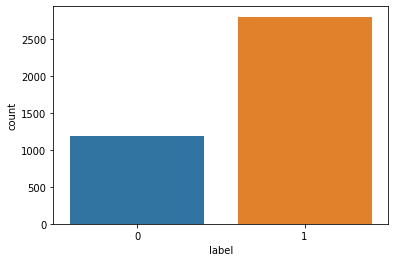

In [ ]:
sns.countplot(training_data['label'])

In [ ]:
trainingdata, valdata, testdata = np.split(data_for_classifier.sample(frac=1), [int(.6*len(data_for_classifier)), int(.8*len(data_for_classifier))])

In [ ]:
print("Training data: ", trainingdata.shape)
print("Test data: ", testdata.shape)
print("Validation data: ", valdata.shape)

Training data:  (3000, 6)
Test data:  (1000, 6)
Validation data:  (1000, 6)


In [ ]:
#training_data_example = training_data['text'].tolist()[0]
training_data_example = trainingdata['text'].tolist()[12]
print(training_data_example)

NURSING PROGRESS NOTE:
PT IS A 65 YO MAN WITH HX OF HTN WHO WAS REFERRED TO [**Hospital1 40**] ED BY HIS PCP FOR EVALUATION OF NEW ACUTE ONSET OF JAUNDICE AND INCREASING ABDOMINAL GIRTH. PT STATES THIS BEGAN 4 WKS AGO. AND THIS WEEK NOTED A 20LB WGT GAIN.  PCP FOUND [**Name9 (PRE) 1516**] HCT AND BILIRUBIN, HAD ABD CT DONE WHICH SHOWED A CIRRHOTIC LIVER, ASCITES AND PORTAL VEIN THROMBUS. IN THE ED HE WAS FOUND TO HAVE A HCT OF 70.6 AND INR OF 3.5. VSS, NO DISTRESS, NO C/O PAIN. PT IS AFEBRILE. HR IN THE 60'S AND BP 103/58. O2 SAT'S 98% ON RA. PT [**Name (NI) 421**] 3L FLUID. HEMATOLOGY CONSULTED AND DID A THERPEUTIC PHLEBOTOMY AND REMOVED 500 CC BLOOD TO HELP REDUCE HIS HCT. A FOLEY CATH WAS PLACED FOR SMALL AMT'S OF ICTERIC URINE. PT TRANSFERRED TO MICU FOR FURTHER MANAGEMENT.

PMH: HTN AND TAKES TOPROL XL AT HOME.

NKDA

LIVES AT HOME WITH WIFE.

PT IS FULL CODE.


REVEIW OF SYSTEMS:

NEURO: PT IS ALERT AND ORIENTED X 3. VERY COOPERATIVE PLEASANT MAN.
ABLE TO MOVE ALL EXTREMETIES. PE

In [ ]:
import tensorflow as tf

# Get the GPU device name.
device_name = tf.test.gpu_device_name()

# The device name should look like the following:
if device_name == '/device:GPU:0':
    print('Found GPU at: {}'.format(device_name))
else:
    raise SystemError('GPU device not found')

In [ ]:
import torch

# If there's a GPU available...
if torch.cuda.is_available():    

    # Tell PyTorch to use the GPU.    
    device = torch.device("cuda")

    print('There are %d GPU(s) available.' % torch.cuda.device_count())

    print('We will use the GPU:', torch.cuda.get_device_name(0))

# If not...
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

In [ ]:
!pip install transformers==4.5.0

In [ ]:
from collections import Counter
import numpy as np
import pandas as pd
import torch
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report
from sklearn.model_selection import StratifiedKFold
from torch.nn.utils.rnn import pad_sequence
from torch.utils.data import TensorDataset
from tqdm import trange
from transformers import BertForSequenceClassification, BertTokenizerFast, BertTokenizer, AdamW, AutoModel, AutoModelForSequenceClassification, AutoTokenizer

In [ ]:
BERT_tokenizer = 'bert-base-uncased'

MAX_TKN_LEN=511

In [ ]:
# import BERT-base pretrained model
#trained_bert_model = AutoModel.from_pretrained('bert-base-uncased')
trained_bert_model = AutoModelForSequenceClassification.from_pretrained(BERT_tokenizer, num_labels = 2, output_attentions = False, output_hidden_states = False)
trained_bert_model.cuda()

# Load the BERT tokenizer
tokenizer = BertTokenizerFast.from_pretrained('bert-base-uncased')

# Ignore - BoW Representation

BoW Representation

In [ ]:
first_vectorizer = CountVectorizer(ngram_range=(1,1), stop_words=None,
                             tokenizer=word_tokenize, max_features=500)
#first_vectorizer.fit(training_data['text'].tolist())
first_vectorizer.fit(training_data['text'].values.astype('U').tolist())
#first_vectorizer.fit(trainingdata['text'].values.astype('U').tolist())
#first_fit_transformed_data = first_vectorizer.fit_transform(training_data['text'])
first_fit_transformed_data = first_vectorizer.fit_transform(training_data['text'].values.astype('U'))

In [ ]:
first_transformed_data = first_vectorizer.transform([training_data['text'].tolist()[231]])
print (first_transformed_data)

  (0, 9)	1
  (0, 26)	2
  (0, 27)	3
  (0, 38)	1
  (0, 47)	1
  (0, 50)	1
  (0, 57)	1
  (0, 59)	1
  (0, 60)	2
  (0, 67)	3
  (0, 90)	2
  (0, 98)	4
  (0, 103)	2
  (0, 110)	1
  (0, 112)	1
  (0, 120)	1
  (0, 134)	1
  (0, 136)	1
  (0, 169)	1
  (0, 175)	1
  (0, 176)	1
  (0, 185)	1
  (0, 214)	1
  (0, 217)	1
  (0, 231)	1
  :	:
  (0, 307)	1
  (0, 309)	1
  (0, 314)	1
  (0, 320)	1
  (0, 321)	1
  (0, 341)	1
  (0, 350)	2
  (0, 352)	1
  (0, 353)	1
  (0, 355)	1
  (0, 372)	1
  (0, 374)	2
  (0, 379)	3
  (0, 382)	1
  (0, 389)	1
  (0, 419)	1
  (0, 425)	1
  (0, 441)	5
  (0, 443)	1
  (0, 445)	1
  (0, 451)	1
  (0, 458)	2
  (0, 463)	3
  (0, 489)	3
  (0, 495)	1


In [ ]:
print (first_vectorizer.get_feature_names()[88])

by


In [ ]:
print(first_fit_transformed_data.shape)
print ('Amount of Non-Zero occurences: ', first_fit_transformed_data.nnz)

(4000, 500)
Amount of Non-Zero occurences:  296671


Build a classifier with this feature representation

K-nearest Neighbour

In [ ]:
kneighbour_classifier = KNeighborsClassifier().fit(first_fit_transformed_data, training_data['label'])

In [ ]:
## We need to transform test data to the same representation
first_fit_transformed_testdata = first_vectorizer.transform(testing_data['text'].values.astype('U'))

In [ ]:
first_fit_transformed_testdata
kneighbour_predicted = kneighbour_classifier.predict(first_fit_transformed_testdata)
kneighbour_predicted

array([1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,

In [ ]:
print(metrics.classification_report(testing_data['label'], kneighbour_predicted, target_names=set(testing_data['label'].values.astype('U').tolist())))

              precision    recall  f1-score   support

           1       0.65      0.71      0.67       307
           0       0.86      0.83      0.85       693

    accuracy                           0.79      1000
   macro avg       0.76      0.77      0.76      1000
weighted avg       0.80      0.79      0.79      1000



We can employ n-fold cross-validation on the training data to experiment with different representations, parameters, and classifiers.

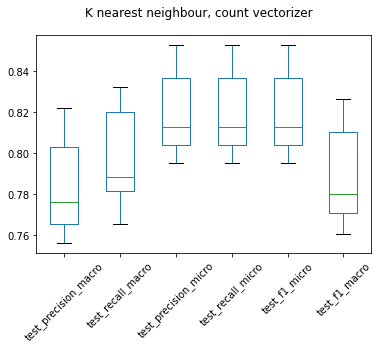

In [ ]:
kneighbour_classifier = KNeighborsClassifier().fit(first_fit_transformed_data, training_data['label'])
scoring = ['precision_macro', 'recall_macro','precision_micro','recall_micro', 'f1_micro', 'f1_macro']
scores = cross_validate(kneighbour_classifier, first_fit_transformed_data, training_data['label'], scoring=scoring, cv=10, return_train_score=False)
scoresdf = pd.DataFrame(scores)
scoring = ['test_precision_macro', 'test_recall_macro','test_precision_micro','test_recall_micro', 'test_f1_micro', 'test_f1_macro']
bp = scoresdf.boxplot(column=scoring, grid=False, rot=45,)
[ax_tmp.set_xlabel('') for ax_tmp in np.asarray(bp).reshape(-1)]
fig = np.asarray(bp).reshape(-1)[0].get_figure()
fig.suptitle('K nearest neighbour, count vectorizer')
plt.show()

Random Forest Classifier

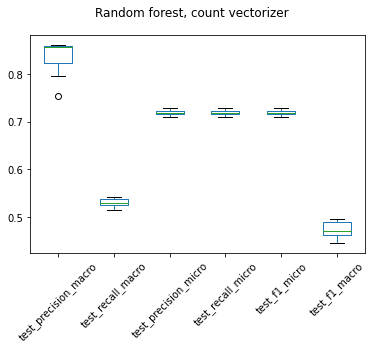

In [ ]:
rf_classifier = RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0).fit(first_fit_transformed_data, training_data['label'])
scoring = ['precision_macro', 'recall_macro','precision_micro','recall_micro', 'f1_micro', 'f1_macro']
scores = cross_validate(rf_classifier, first_fit_transformed_data, training_data['label'], scoring=scoring, cv=10, return_train_score=False)
scoresdf = pd.DataFrame(scores)
scoring = ['test_precision_macro', 'test_recall_macro','test_precision_micro','test_recall_micro', 'test_f1_micro', 'test_f1_macro']
bp = scoresdf.boxplot(column=scoring, grid=False, rot=45,)
[ax_tmp.set_xlabel('') for ax_tmp in np.asarray(bp).reshape(-1)]
fig = np.asarray(bp).reshape(-1)[0].get_figure()
fig.suptitle('Random forest, count vectorizer')
plt.show()

# Ignore - TF-IDF Representation

Tf-idf representation

In [ ]:
stopWords = set(stopwords.words('english'))
tfidf_vect = TfidfVectorizer(tokenizer=word_tokenize, stop_words=stopWords)
tfidf_vect.fit(training_data['text'])
second_fit_transformed_data =  tfidf_vect.transform(training_data['text'])
second_fit_transformed_data

<4000x35281 sparse matrix of type '<class 'numpy.float64'>'
	with 580757 stored elements in Compressed Sparse Row format>

Use this with Multinomial Naive Bayes classifier

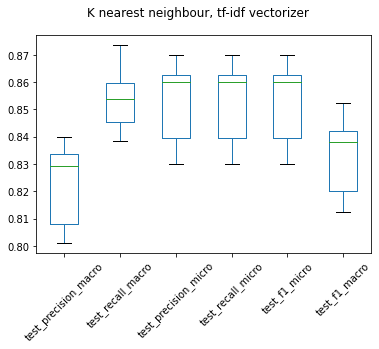

In [ ]:
kneighbour_classifier = KNeighborsClassifier().fit(second_fit_transformed_data, training_data['label'])
scoring = ['precision_macro', 'recall_macro','precision_micro','recall_micro', 'f1_micro', 'f1_macro']
scores = cross_validate(kneighbour_classifier, second_fit_transformed_data, training_data['label'], scoring=scoring, cv=10, return_train_score=False)
scoresdf = pd.DataFrame(scores)
scoring = ['test_precision_macro', 'test_recall_macro','test_precision_micro','test_recall_micro', 'test_f1_micro', 'test_f1_macro']
bp = scoresdf.boxplot(column=scoring, grid=False, rot=45,)
[ax_tmp.set_xlabel('') for ax_tmp in np.asarray(bp).reshape(-1)]
fig = np.asarray(bp).reshape(-1)[0].get_figure()
fig.suptitle('K nearest neighbour, tf-idf vectorizer')
plt.show()

# Ignore - Embedding Representations

Embedding Representations

In [ ]:
glove = EmbeddingTransformer('glove')

[==================================================] 100.0% 104.8/104.8MB downloaded


In [ ]:
glove_transformed_training_data = glove.transform(training_data['text'])

In [ ]:
glove_transformed_training_data

array([[-0.24123687,  0.07319715, -0.02237855, ...,  0.1568924 ,
        -0.12193071, -0.41158548],
       [-0.14391929,  0.19382294, -0.23808418, ...,  0.09861008,
         0.02377283, -0.39218298],
       [ 0.08689217,  0.19908549, -0.24771333, ...,  0.29630953,
        -0.09994566, -0.66366357],
       ...,
       [-0.25884473,  0.2340758 , -0.1379728 , ..., -0.02505304,
        -0.02948467, -0.3200417 ],
       [-0.15315302,  0.3995472 , -0.18700252, ...,  0.08463383,
        -0.02895456, -0.4207415 ],
       [-0.21220496,  0.04837096, -0.05878698, ...,  0.16519669,
        -0.08002367, -0.40394887]], dtype=float32)

Build a classifier with this representation and evaluate with 10-fold cross-validation

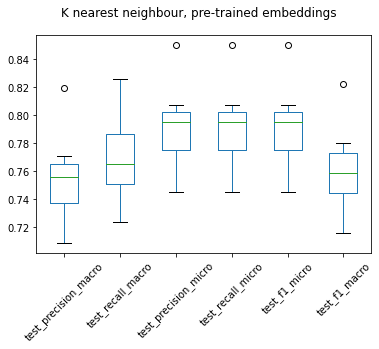

In [ ]:
kneighbour_classifier = KNeighborsClassifier().fit(glove_transformed_training_data, training_data['label'])
scoring = ['precision_macro', 'recall_macro','precision_micro','recall_micro', 'f1_micro', 'f1_macro']
scores = cross_validate(kneighbour_classifier, glove_transformed_training_data, training_data['label'], scoring=scoring, cv=10, return_train_score=False)
scoresdf = pd.DataFrame(scores)
scoring = ['test_precision_macro', 'test_recall_macro','test_precision_micro','test_recall_micro', 'test_f1_micro', 'test_f1_macro']
bp = scoresdf.boxplot(column=scoring, grid=False, rot=45,)
[ax_tmp.set_xlabel('') for ax_tmp in np.asarray(bp).reshape(-1)]
fig = np.asarray(bp).reshape(-1)[0].get_figure()
fig.suptitle('K nearest neighbour, pre-trained embeddings')
plt.show()

# Ignore - Different configurations in one go

Some different configurations all in one go

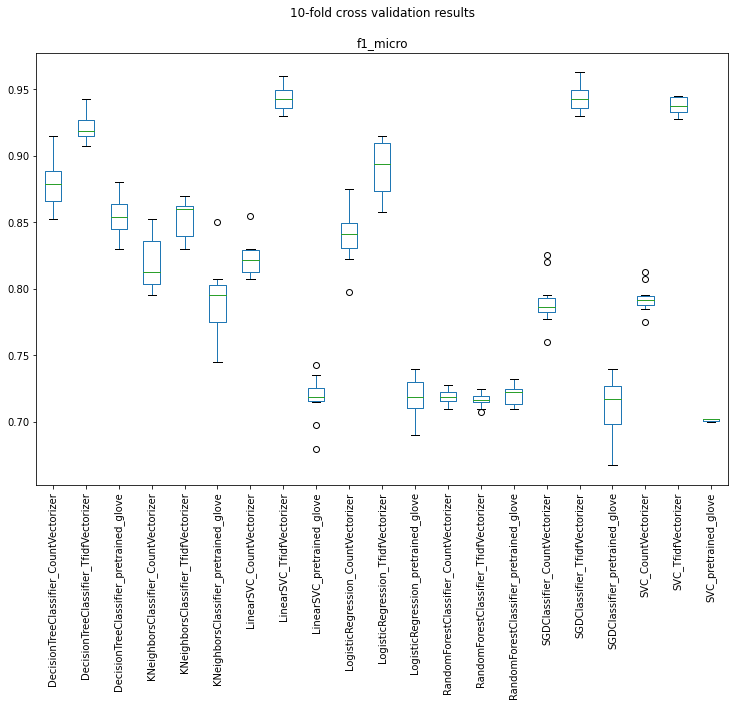

In [ ]:

representations = {}

vectorizer = CountVectorizer(ngram_range=(1,1), stop_words=None,
                             tokenizer=word_tokenize, max_features=500)
xtrain_countvect = vectorizer.fit_transform(training_data['text'])
representations['CountVectorizer'] = xtrain_countvect

tfidf_vect = TfidfVectorizer(tokenizer=word_tokenize, stop_words=stopWords)
tfidf_vect.fit(training_data['text'])
xtrain_tfidf =  tfidf_vect.transform(training_data['text'])
representations['TfidfVectorizer'] = xtrain_tfidf

x_train_glove = glove.transform(training_data['text'])
representations['pretrained_glove'] = x_train_glove



CV = 10

classifier_models = [
        RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
        DecisionTreeClassifier(),
        SVC(),
        LinearSVC(multi_class='ovr', C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
      penalty='l2', random_state=0, tol=1e-05, verbose=0),
        SGDClassifier(),
        LogisticRegression(random_state=0),
        KNeighborsClassifier(),
]

cv_df = pd.DataFrame(index=range(CV * (len(classifier_models)*len(representations))))
entries = []


for representation, transformed_vector in representations.items():
    score = 'f1_micro'
    for model in classifier_models:
      model_name = model.__class__.__name__+'_'+representation
      accuracies = cross_val_score(model, transformed_vector, training_data['label'], scoring=score, cv=CV)
      for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', score])
bp = cv_df.boxplot(by='model_name', column=[score], grid=False, rot=90, figsize=(12,8))
[ax_tmp.set_xlabel('') for ax_tmp in np.asarray(bp).reshape(-1)]
fig = np.asarray(bp).reshape(-1)[0].get_figure()
fig.suptitle('10-fold cross validation results')
plt.show()

# Ignore - More experiments

In [ ]:

## First step: Transform your training and test data to your chosen representation. 

## choose a representation: CountVectorizer or TfidfVectorizer, or embeddings

chosen_representation = tfidf_vect 

## transform the training data 
transformed_training_data = chosen_representation.transform(training_data['text'])

## transform the test data
transformed_test_data = chosen_representation.transform(testing_data['text'])

## Second step: Create a classifier - the one you think gave best results when experimenting with cross-validation


chosen_classifier = LinearSVC(multi_class='ovr', C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
      penalty='l2', random_state=0, tol=1e-05, verbose=0) 

## train the classifier on the training data
chosen_classifier.fit(transformed_training_data, training_data['label'])

## predict labels on the test data
predicted = chosen_classifier.predict(transformed_test_data)

## what results do you get? Note that you can look at both macro and micro scores!
print(metrics.classification_report(testing_data['label'], predicted, target_names=set(testing_data['label'].values.astype('U').tolist())))

              precision    recall  f1-score   support

           1       0.92      0.96      0.94       494
           0       0.96      0.92      0.94       506

    accuracy                           0.94      1000
   macro avg       0.94      0.94      0.94      1000
weighted avg       0.94      0.94      0.94      1000



Get confidence intervals - https://sebastianraschka.com/blog/2022/confidence-intervals-for-ml.html

code - https://gist.github.com/roncho12/60178f12ea4c3a74764fd645c6f2fe13

https://towardsdatascience.com/how-to-add-confidence-intervals-to-any-model-7bbb9f80fd9c


https://sebastianraschka.com/blog/2022/confidence-intervals-for-ml.html


In [ ]:
import scipy.stats

Bootstrapping

# Ignore - Predict on unseen random text

Predict unseen random text

In [ ]:
new_text = 'Patient with severe depression and heart pain.'
testX = chosen_representation.transform([new_text])
predicted = chosen_classifier.predict(testX)
print(predicted)

[1]


In [ ]:
new_text = '5-year old girl with asthma.'
testX = chosen_representation.transform([new_text])
predicted = chosen_classifier.predict(testX)
print(predicted)

[1]


In [ ]:
new_text = 'Her asthma was getting better'
testX = chosen_representation.transform([new_text])
predicted = chosen_classifier.predict(testX)
print(predicted)

[1]


In [ ]:
new_text = 'that movie was amazing.'
testX = chosen_representation.transform([new_text])
predicted = chosen_classifier.predict(testX)
print(predicted)

[1]
